# Predicting Breast Cancer
This looks into using various R machine learning and data-science libraries in an attempt to build a machine learning model capable to predict whether or not a person has breast cancer based on their medical attributes.

## Project approach:

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem definition
In a statement:

> Based on a model trained on synthetic data, how well can said model predict whether or not a clinical patient have breast cancer?

## 2. Data
The original data came from the Coimbra data of the UCI Machine Learning Repository. https://archive.ics.uci.edu/dataset/451/breast+cancer+coimbra

It will be used alongside a synthetic data found in Kaggle.
https://www.kaggle.com/datasets/atom1991/breast-cancer-coimbra

## 3. Evaluation
> The model will be evaluated on various metrics: accuracy, precision, recall, f1-score, confusion matrix.

## 4. Features
A list of important information regarding the features of the data.

**Create data dictionary**
Quantitative Attributes:

1. Age (years): Represents the age of individuals in the dataset.
2. BMI (kg/m²): Body Mass Index, a measure of body fat based on weight and height.
3. Glucose (mg/dL): Reflects blood glucose levels, a vital metabolic indicator.
4. Insulin (µU/mL): Indicates insulin levels, a hormone associated with glucose regulation.
5. HOMA: Homeostatic Model Assessment, a method assessing insulin resistance and beta-cell function.
6. Leptin (ng/mL): Represents leptin levels, a hormone involved in appetite and energy balance regulation.
7. Adiponectin (µg/mL): Reflects adiponectin levels, a protein associated with metabolic regulation.
8. Resistin (ng/mL): Indicates resistin levels, a protein implicated in insulin resistance.
9. MCP-1 (pg/dL): Reflects Monocyte Chemoattractant Protein-1 levels, a cytokine involved in inflammation.
10. Labels: 
    - 1: Healthy controls
    - 2: Patients with breast cancer

### Import libraries

In [1]:
library(tidyverse)
library(dplyr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### Import dataset:

In [2]:
data <- read_csv("/kaggle/input/breast-cancer-coimbra/Coimbra_breast_cancer_dataset.csv")

head(data)

Rows: 4000 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (10): Age, BMI, Glucose, Insulin, HOMA, Leptin, Adiponectin, Resistin, M...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
54,35.20739,103,5.642,1.378660,65.6699,9.738408,31.17499,197.660,1
52,22.97852,132,6.054,1.145435,47.5445,3.627241,23.03327,423.361,2
32,21.10134,87,5.668,1.008595,50.5074,5.067841,9.51156,897.034,2
42,26.76121,132,2.875,1.003837,16.8972,10.096475,9.75652,267.744,1
55,34.23252,76,3.120,1.597721,17.6852,11.845054,17.21541,788.552,2
47,26.64322,136,3.375,4.516214,29.4842,10.356278,5.59087,354.180,1


In [3]:
colnames(data)

[1] "Age"            "BMI"            "Glucose"        "Insulin"       
 [5] "HOMA"           "Leptin"         "Adiponectin"    "Resistin"      
 [9] "MCP.1"          "Classification"

In [4]:
# org_data <- read_csv("/kaggle/input/breastcancercoimbra-csv/BreastCancerCoimbra.csv")
org_data <- read_csv("/kaggle/input/breast-cancer-coimbra-data-set/dataR2.csv")

head(org_data)

Rows: 116 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (10): Age, BMI, Glucose, Insulin, HOMA, Leptin, Adiponectin, Resistin, M...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
48,23.50000,70,2.707,0.4674087,8.8071,9.702400,7.99585,417.114,1
83,20.69049,92,3.115,0.7068973,8.8438,5.429285,4.06405,468.786,1
82,23.12467,91,4.498,1.0096511,17.9393,22.432040,9.27715,554.697,1
68,21.36752,77,3.226,0.6127249,9.8827,7.169560,12.76600,928.220,1
86,21.11111,92,3.549,0.8053864,6.6994,4.819240,10.57635,773.920,1
49,22.85446,92,3.226,0.7320869,6.8317,13.679750,10.31760,530.410,1


In [5]:
colnames(org_data)

[1] "Age"            "BMI"            "Glucose"        "Insulin"       
 [5] "HOMA"           "Leptin"         "Adiponectin"    "Resistin"      
 [9] "MCP.1"          "Classification"

In [6]:
# Check the similarity of feature names of both datasets
all.equal(colnames(data), colnames(org_data))

[1] TRUE

### Exploratory Data Analysis

EDA is applied to the two datasets, the synthetic and the original datasets.

#### Synthetic dataset

In [7]:
# View the dimension
dim(data)

[1] 4000   10

What is the class of the columns in the dataframe?

In [8]:
str(data)

spc_tbl_ [4,000 × 10] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Age           : num [1:4000] 54 52 32 42 55 47 32 53 57 83 ...
 $ BMI           : num [1:4000] 35.2 23 21.1 26.8 34.2 ...
 $ Glucose       : num [1:4000] 103 132 87 132 76 136 134 131 76 76 ...
 $ Insulin       : num [1:4000] 5.64 6.05 5.67 2.88 3.12 ...
 $ HOMA          : num [1:4000] 1.38 1.15 1.01 1 1.6 ...
 $ Leptin        : num [1:4000] 65.7 47.5 50.5 16.9 17.7 ...
 $ Adiponectin   : num [1:4000] 9.74 3.63 5.07 10.1 11.85 ...
 $ Resistin      : num [1:4000] 31.17 23.03 9.51 9.76 17.22 ...
 $ MCP.1         : num [1:4000] 198 423 897 268 789 ...
 $ Classification: num [1:4000] 1 2 2 1 2 1 2 1 2 1 ...
 - attr(*, "spec")=
  .. cols(
  ..   Age = col_double(),
  ..   BMI = col_double(),
  ..   Glucose = col_double(),
  ..   Insulin = col_double(),
  ..   HOMA = col_double(),
  ..   Leptin = col_double(),
  ..   Adiponectin = col_double(),
  ..   Resistin = col_double(),
  ..   MCP.1 = col_double(),
  ..   Classification =

Convert features into their appropriate datatypes. Features with values without decimal points are converted into integers and features with classes are converted into factors. Features with decimal points will remain as numeric.
- `Age`: `integer`
- `BMI`: `numeric`
- `Glucose`: `integer`
- `Insulin`: `numeric`
- `HOMA`: `numeric`
- `Leptin`: `numeric`
- `Adiponectin`: `numeric`
- `Resistin`: `numeric`
- `MCP.1`: `integer`
- `Classification`: `factor`

In [9]:
# Convert features datatype from numeric to integer
data$Age <- as.integer(data$Age)
data$Glucose <- as.integer(data$Glucose)
data$MCP.1 <- as.integer(data$MCP.1)

# Convert target feature datatype from numeric to factor
data$Classification <- as.factor(data$Classification)

In [10]:
str(data)

spc_tbl_ [4,000 × 10] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Age           : int [1:4000] 54 52 32 42 55 47 32 53 57 83 ...
 $ BMI           : num [1:4000] 35.2 23 21.1 26.8 34.2 ...
 $ Glucose       : int [1:4000] 103 132 87 132 76 136 134 131 76 76 ...
 $ Insulin       : num [1:4000] 5.64 6.05 5.67 2.88 3.12 ...
 $ HOMA          : num [1:4000] 1.38 1.15 1.01 1 1.6 ...
 $ Leptin        : num [1:4000] 65.7 47.5 50.5 16.9 17.7 ...
 $ Adiponectin   : num [1:4000] 9.74 3.63 5.07 10.1 11.85 ...
 $ Resistin      : num [1:4000] 31.17 23.03 9.51 9.76 17.22 ...
 $ MCP.1         : int [1:4000] 197 423 897 267 788 354 331 415 585 209 ...
 $ Classification: Factor w/ 2 levels "1","2": 1 2 2 1 2 1 2 1 2 1 ...
 - attr(*, "spec")=
  .. cols(
  ..   Age = col_double(),
  ..   BMI = col_double(),
  ..   Glucose = col_double(),
  ..   Insulin = col_double(),
  ..   HOMA = col_double(),
  ..   Leptin = col_double(),
  ..   Adiponectin = col_double(),
  ..   Resistin = col_double(),
  ..   MCP.1 = co

In [11]:
# View count of null values
sum(is.na(data))

[1] 0

This data does not contain any missing values so we do not need to remove or replace any rows.

Display the summary statistics for the numeric variables (which includes both integer and floats):

In [12]:
# Subset of data containing only numeric data
numeric_data <- data[, -which(colnames(data) == "Classification")]

In [13]:
summary(numeric_data)

      Age             BMI           Glucose         Insulin      
 Min.   :32.00   Min.   :20.69   Min.   : 76.0   Min.   : 2.821  
 1st Qu.:39.00   1st Qu.:23.08   1st Qu.: 76.0   1st Qu.: 4.422  
 Median :56.00   Median :27.56   Median :131.0   Median : 5.818  
 Mean   :56.21   Mean   :27.42   Mean   :113.9   Mean   : 8.654  
 3rd Qu.:72.00   3rd Qu.:30.81   3rd Qu.:134.0   3rd Qu.:10.466  
 Max.   :85.00   Max.   :36.21   Max.   :138.0   Max.   :30.211  
      HOMA            Leptin        Adiponectin        Resistin     
 Min.   :0.5900   Min.   : 6.832   Min.   : 3.192   Min.   : 4.190  
 1st Qu.:0.9701   1st Qu.:12.713   1st Qu.: 5.580   1st Qu.: 7.022  
 Median :1.3738   Median :19.805   Median : 8.287   Median :10.693  
 Mean   :2.0243   Mean   :25.138   Mean   : 9.365   Mean   :13.054  
 3rd Qu.:2.5028   3rd Qu.:36.670   3rd Qu.:10.918   3rd Qu.:17.295  
 Max.   :8.2185   Max.   :68.507   Max.   :22.537   Max.   :42.618  
     MCP.1       
 Min.   : 137.0  
 1st Qu.: 299.0  
 

In [14]:
head(data)

Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>
54,35.20739,103,5.642,1.378660,65.6699,9.738408,31.17499,197,1
52,22.97852,132,6.054,1.145435,47.5445,3.627241,23.03327,423,2
32,21.10134,87,5.668,1.008595,50.5074,5.067841,9.51156,897,2
42,26.76121,132,2.875,1.003837,16.8972,10.096475,9.75652,267,1
55,34.23252,76,3.120,1.597721,17.6852,11.845054,17.21541,788,2
47,26.64322,136,3.375,4.516214,29.4842,10.356278,5.59087,354,1


In [15]:
head(numeric_data)

Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
54,35.20739,103,5.642,1.378660,65.6699,9.738408,31.17499,197
52,22.97852,132,6.054,1.145435,47.5445,3.627241,23.03327,423
32,21.10134,87,5.668,1.008595,50.5074,5.067841,9.51156,897
42,26.76121,132,2.875,1.003837,16.8972,10.096475,9.75652,267
55,34.23252,76,3.120,1.597721,17.6852,11.845054,17.21541,788
47,26.64322,136,3.375,4.516214,29.4842,10.356278,5.59087,354


Histograms of numeric variables:

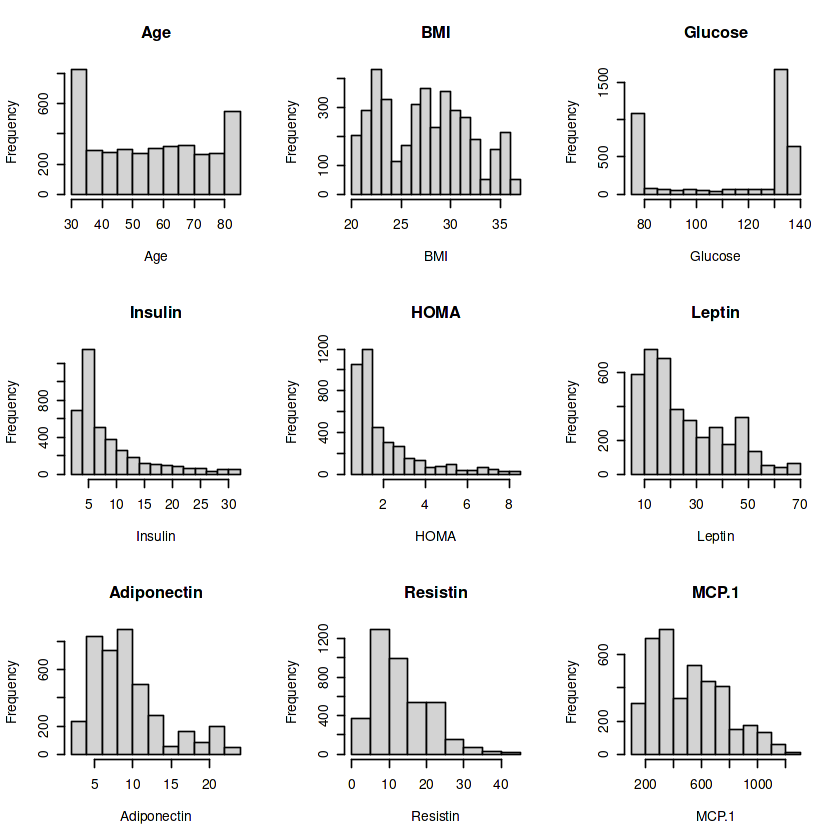

In [16]:
# Setting up the layout for multiple histograms
par(mfrow = c(3, 3))

# Looping through each numeric variable to create histograms
for (i in 1:ncol(numeric_data)) {
    hist(numeric_data[[i]], main = colnames(numeric_data)[i], xlab = colnames(numeric_data)[i])
}

Find the count of each class in target feature.

In [17]:
counts <- table(data$Classification)

counts


   1    2 
1784 2216 

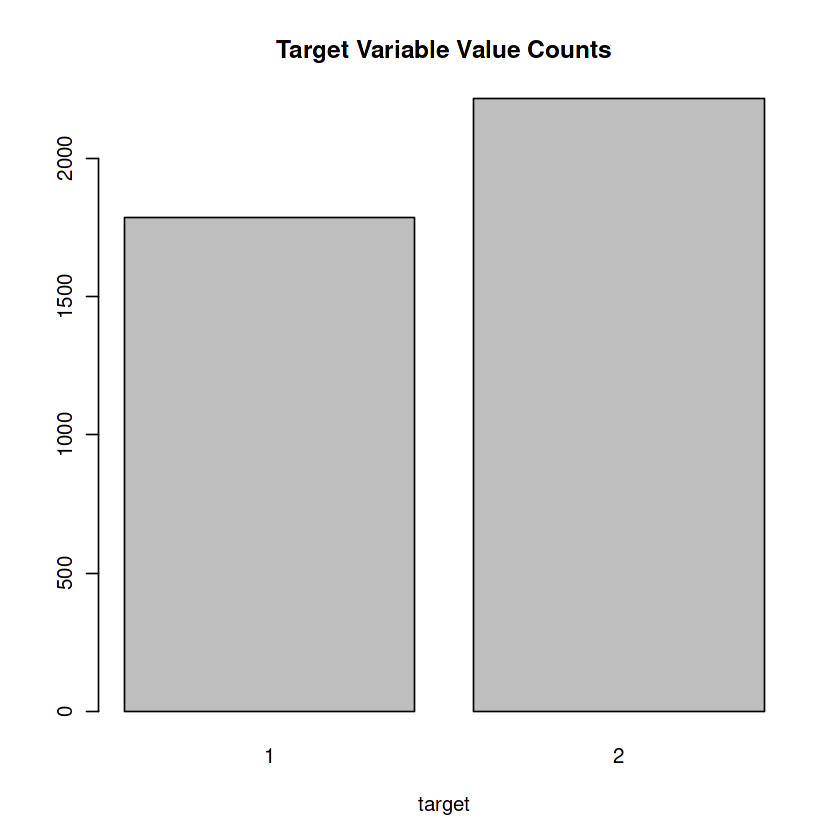

In [18]:
barplot(counts, main="Target Variable Value Counts", xlab="target")

Calculate the correlation matrix between the different variables:

In [19]:
correlation_matrix <- cor(numeric_data)
correlation_matrix

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
Age,1.000000000,0.019139084,0.0026106626,0.0007423400,0.0246307970,0.005058408,-0.013493173,-0.0134379745,-0.019420181
BMI,0.019139084,1.000000000,-0.0144685660,0.0115743909,0.0127951212,-0.011482224,-0.002348453,0.0053032733,-0.023411886
Glucose,0.002610663,-0.014468566,1.0000000000,0.0005577622,-0.0182322119,-0.006460603,0.016363158,0.0141791937,0.001868883
Insulin,0.000742340,0.011574391,0.0005577622,1.0000000000,-0.0131416590,0.005678374,-0.014559692,0.0361359879,-0.011413555
HOMA,0.024630797,0.012795121,-0.0182322119,-0.0131416590,1.0000000000,0.006751233,0.003433022,0.0002720846,0.009967179
Leptin,0.005058408,-0.011482224,-0.0064606033,0.0056783744,0.0067512331,1.000000000,0.024053842,0.0142167959,-0.003354728
Adiponectin,-0.013493173,-0.002348453,0.0163631580,-0.0145596916,0.0034330222,0.024053842,1.000000000,-0.0189448380,-0.018312770
Resistin,-0.013437974,0.005303273,0.0141791937,0.0361359879,0.0002720846,0.014216796,-0.018944838,1.0000000000,-0.007619783
MCP.1,-0.019420181,-0.023411886,0.0018688834,-0.0114135546,0.0099671791,-0.003354728,-0.018312770,-0.0076197833,1.000000000


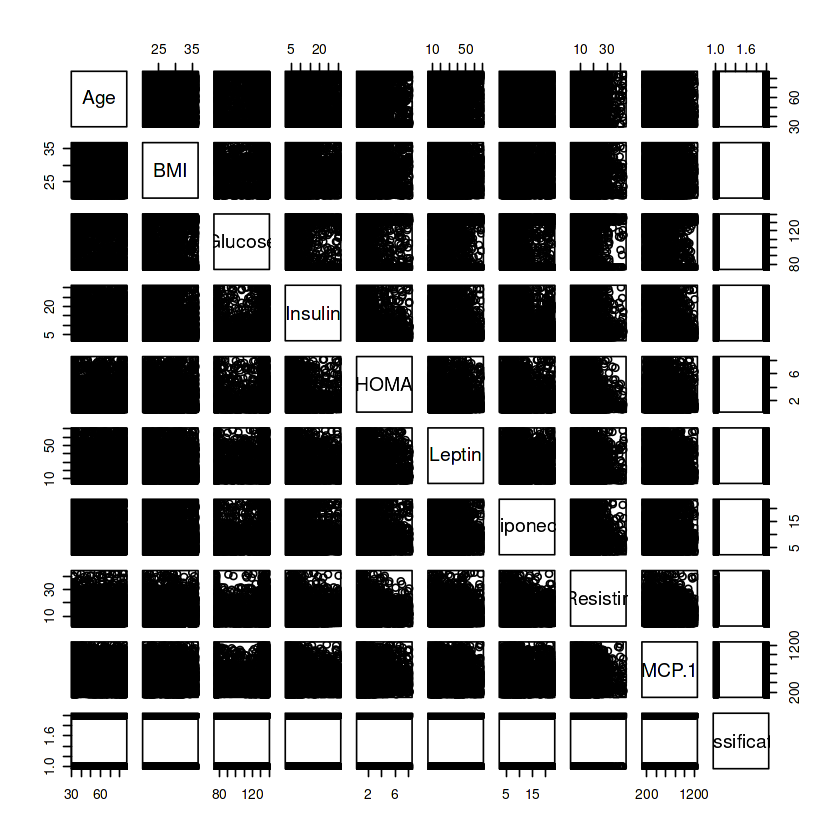

In [20]:
pairs(data)

In [21]:
library(corrplot)

corrplot 0.92 loaded



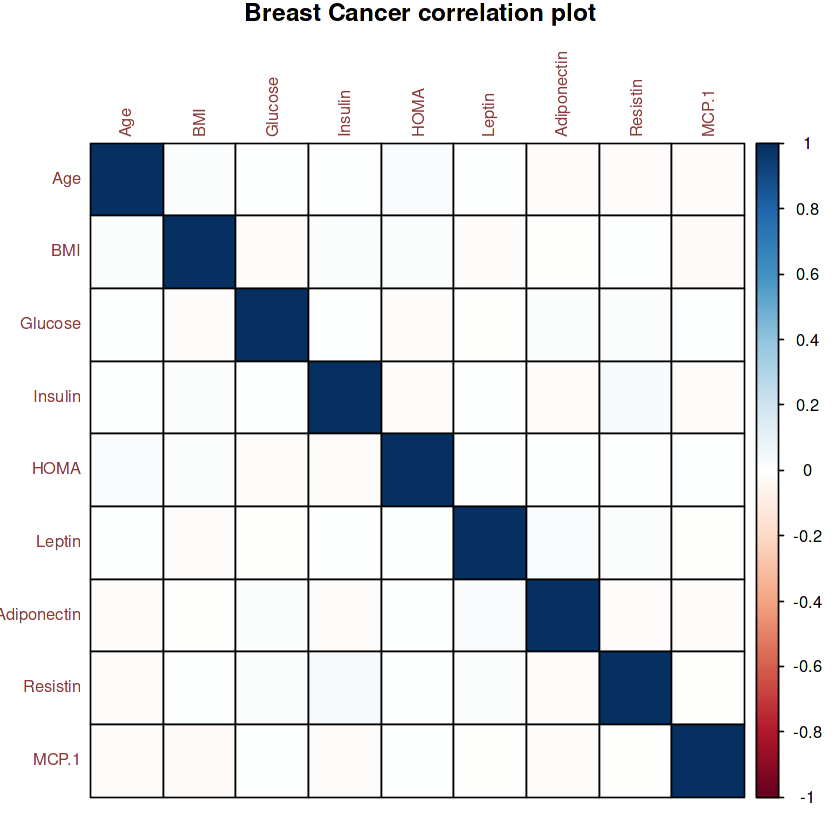

In [22]:
corrplot(correlation_matrix, type="full", method ="color", title = "Breast Cancer correlation plot", mar=c(0,0,1,0), tl.cex= 0.8, outline= T, tl.col="indianred4")

There does not seem to be high correlations between the features.

#### Original Dataset

In [23]:
# View the dimension
dim(org_data)

[1] 116  10

What is the class of the features in the dataset?

In [24]:
str(org_data)

spc_tbl_ [116 × 10] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Age           : num [1:116] 48 83 82 68 86 49 89 76 73 75 ...
 $ BMI           : num [1:116] 23.5 20.7 23.1 21.4 21.1 ...
 $ Glucose       : num [1:116] 70 92 91 77 92 92 77 118 97 83 ...
 $ Insulin       : num [1:116] 2.71 3.12 4.5 3.23 3.55 ...
 $ HOMA          : num [1:116] 0.467 0.707 1.01 0.613 0.805 ...
 $ Leptin        : num [1:116] 8.81 8.84 17.94 9.88 6.7 ...
 $ Adiponectin   : num [1:116] 9.7 5.43 22.43 7.17 4.82 ...
 $ Resistin      : num [1:116] 8 4.06 9.28 12.77 10.58 ...
 $ MCP.1         : num [1:116] 417 469 555 928 774 ...
 $ Classification: num [1:116] 1 1 1 1 1 1 1 1 1 1 ...
 - attr(*, "spec")=
  .. cols(
  ..   Age = col_double(),
  ..   BMI = col_double(),
  ..   Glucose = col_double(),
  ..   Insulin = col_double(),
  ..   HOMA = col_double(),
  ..   Leptin = col_double(),
  ..   Adiponectin = col_double(),
  ..   Resistin = col_double(),
  ..   MCP.1 = col_double(),
  ..   Classification = col_double()

Convert features into their appropriate datatypes. Features with values without decimal points are converted into integers and features with classes are converted into factors. Features with decimal points will remain as numeric.
- `Age`: `integer`
- `BMI`: `numeric`
- `Glucose`: `integer`
- `Insulin`: `numeric`
- `HOMA`: `numeric`
- `Leptin`: `numeric`
- `Adiponectin`: `numeric`
- `Resistin`: `numeric`
- `MCP.1`: `integer`
- `Classification`: `factor`

In [25]:
# Convert features datatype from numeric to integer
org_data$Age <- as.integer(org_data$Age)
org_data$Glucose <- as.integer(org_data$Glucose)
org_data$MCP.1 <- as.integer(org_data$MCP.1)

# Convert target feature datatype from numeric to factor
org_data$Classification <- as.factor(org_data$Classification)

In [26]:
str(org_data)

spc_tbl_ [116 × 10] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Age           : int [1:116] 48 83 82 68 86 49 89 76 73 75 ...
 $ BMI           : num [1:116] 23.5 20.7 23.1 21.4 21.1 ...
 $ Glucose       : int [1:116] 70 92 91 77 92 92 77 118 97 83 ...
 $ Insulin       : num [1:116] 2.71 3.12 4.5 3.23 3.55 ...
 $ HOMA          : num [1:116] 0.467 0.707 1.01 0.613 0.805 ...
 $ Leptin        : num [1:116] 8.81 8.84 17.94 9.88 6.7 ...
 $ Adiponectin   : num [1:116] 9.7 5.43 22.43 7.17 4.82 ...
 $ Resistin      : num [1:116] 8 4.06 9.28 12.77 10.58 ...
 $ MCP.1         : int [1:116] 417 468 554 928 773 530 1256 280 136 318 ...
 $ Classification: Factor w/ 2 levels "1","2": 1 1 1 1 1 1 1 1 1 1 ...
 - attr(*, "spec")=
  .. cols(
  ..   Age = col_double(),
  ..   BMI = col_double(),
  ..   Glucose = col_double(),
  ..   Insulin = col_double(),
  ..   HOMA = col_double(),
  ..   Leptin = col_double(),
  ..   Adiponectin = col_double(),
  ..   Resistin = col_double(),
  ..   MCP.1 = col_double(),

In [27]:
# View count of null data
sum(is.na(org_data))

[1] 0

Since there are no null values, there is no need to replace or remove observations and/or features.

Display the summary statistics for the numeric variables (which includes both integer and floats):

In [28]:
summary(org_data[, -which(colnames(org_data) == "Classification")])

      Age            BMI           Glucose          Insulin      
 Min.   :24.0   Min.   :18.37   Min.   : 60.00   Min.   : 2.432  
 1st Qu.:45.0   1st Qu.:22.97   1st Qu.: 85.75   1st Qu.: 4.359  
 Median :56.0   Median :27.66   Median : 92.00   Median : 5.925  
 Mean   :57.3   Mean   :27.58   Mean   : 97.79   Mean   :10.012  
 3rd Qu.:71.0   3rd Qu.:31.24   3rd Qu.:102.00   3rd Qu.:11.189  
 Max.   :89.0   Max.   :38.58   Max.   :201.00   Max.   :58.460  
      HOMA             Leptin        Adiponectin        Resistin     
 Min.   : 0.4674   Min.   : 4.311   Min.   : 1.656   Min.   : 3.210  
 1st Qu.: 0.9180   1st Qu.:12.314   1st Qu.: 5.474   1st Qu.: 6.882  
 Median : 1.3809   Median :20.271   Median : 8.353   Median :10.828  
 Mean   : 2.6950   Mean   :26.615   Mean   :10.181   Mean   :14.726  
 3rd Qu.: 2.8578   3rd Qu.:37.378   3rd Qu.:11.816   3rd Qu.:17.755  
 Max.   :25.0503   Max.   :90.280   Max.   :38.040   Max.   :82.100  
     MCP.1       
 Min.   :  45.0  
 1st Qu.: 26

Histograms of numeric features:

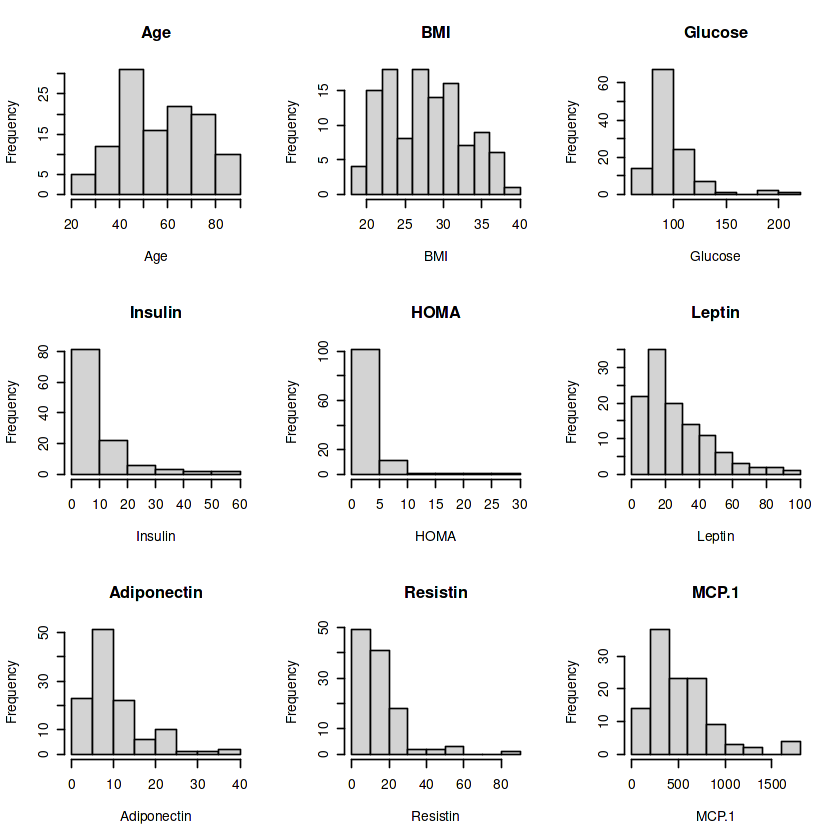

In [29]:
# Setting up the layout for multiple histograms
par(mfrow = c(3, 3))

# Looping through each numeric variable to create histograms
for (i in 1:ncol(data[, -which(colnames(org_data) == "Classification")])) {
    hist(org_data[[i]], main = colnames(org_data)[i], xlab = colnames(org_data)[i])
}

Find the count of each class in target feature.

In [30]:
org_counts <- table(org_data$Classification)

org_counts


 1  2 
52 64 

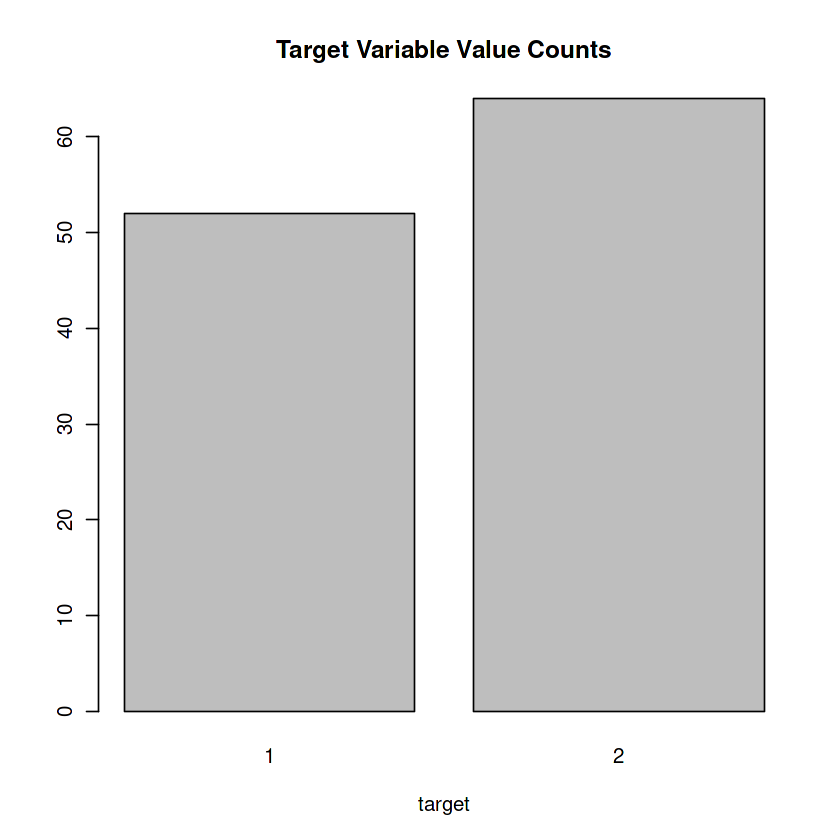

In [31]:
barplot(org_counts, main="Target Variable Value Counts", xlab="target")

Calculate the correlation matrix between the different features.

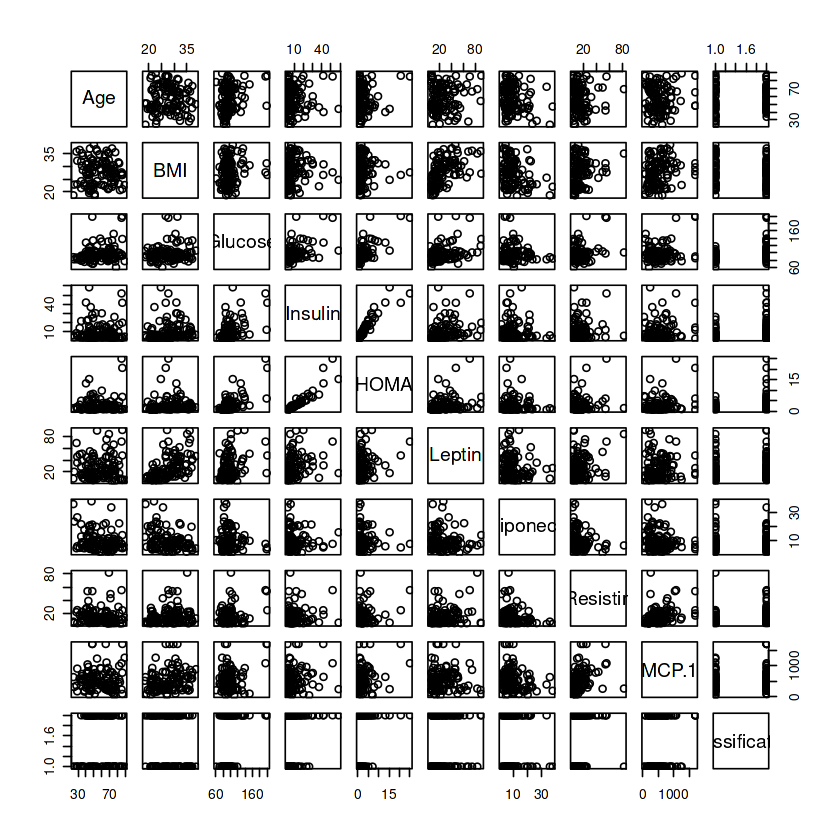

In [32]:
pairs(org_data)

In [33]:
org_cor_matrix <- cor(org_data[, -which(colnames(org_data) == "Classification")])

org_cor_matrix

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
Age,1.000000000,0.008529857,0.2301056,0.03249535,0.12703259,0.10262605,-0.21981289,0.002741708,0.01349574
BMI,0.008529857,1.000000000,0.1388452,0.14529526,0.11448013,0.56959261,-0.30273476,0.195350206,0.22415882
Glucose,0.230105617,0.138845189,1.0000000,0.50465307,0.69621182,0.30507994,-0.12212131,0.291327462,0.26491580
Insulin,0.032495353,0.145295260,0.5046531,1.00000000,0.93219777,0.30146162,-0.03129608,0.146730986,0.17445601
HOMA,0.127032593,0.114480131,0.6962118,0.93219777,1.00000000,0.32720986,-0.05633712,0.231101229,0.25962496
Leptin,0.102626049,0.569592606,0.3050799,0.30146162,0.32720986,1.00000000,-0.09538874,0.256233522,0.01406955
Adiponectin,-0.219812891,-0.302734758,-0.1221213,-0.03129608,-0.05633712,-0.09538874,1.00000000,-0.252363303,-0.20068796
Resistin,0.002741708,0.195350206,0.2913275,0.14673099,0.23110123,0.25623352,-0.25236330,1.000000000,0.36650168
MCP.1,0.013495741,0.224158822,0.2649158,0.17445601,0.25962496,0.01406955,-0.20068796,0.366501681,1.00000000


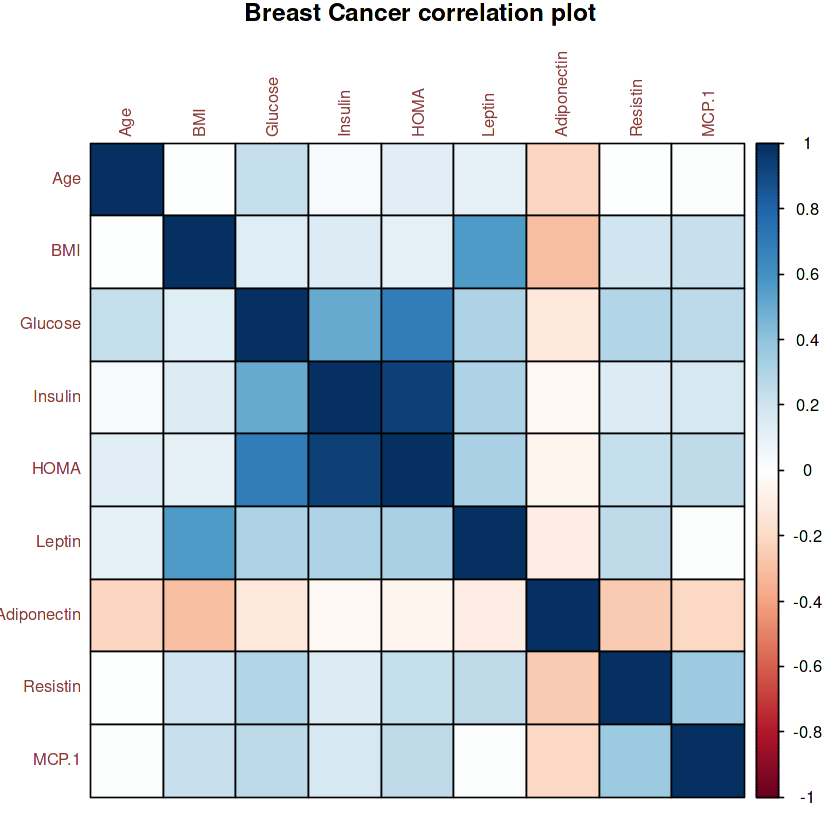

In [34]:
corrplot(org_cor_matrix, type="full", method ="color", title = "Breast Cancer correlation plot", mar=c(0,0,1,0), tl.cex= 0.8, outline= T, tl.col="indianred4")

## 5. Modelling

Once the data has been split into training and test sets, the data will be fit into different machine learning models: 
- Logistic Regression
- K-Nearest Neighbors Classifier (KNN)
- Linear Discriminant Analysis (LDA)
- Quadratic Discriminant Analysis (QDA)

The model will be trained to find the patterns on the training set and tested using the patterns it found on the test set. Since two different datasets will be used, the datasets will be split into train-val-test sets:
- train: 70% of the synthetic data (kaggle data)
- validation: 30% of the synthetic data (kaggle data)
- test: 100% of the original data (UCI ML data)

Split the dataset using 70% for training and 30% for validation and prepare test set:

In [35]:
set.seed(1)

train_index <- sample(1:nrow(data), 0.7 * nrow(data))
training_data <- data[train_index, ]
val_data <- data[-train_index, ]
test_data <- org_data

In [36]:
# Ensure reproducibility of results
set.seed(1)

# cbind(): column bind
train.X <- training_data[, -which(colnames(data) == "Classification")]
val.X <- val_data[, -which(colnames(data) == "Classification")]
test.X <- test_data[, -which(colnames(data) == "Classification")]
train.y <- training_data$Classification
val.y <- val_data$Classification
test.y <- test_data$Classification

**Principal Component Analysis (PCA)**

We will use PCA to check for homogeneity among the datasets. This is important for future generalization. Since we aim to build a predictive model that can generalize to unseen data, it is important to check that the training and testing data comes from similar distributions. If not, the model will not generalize well and have a poor performance.


In [37]:
# standardizing synthetic data
trainX_scaled <- scale(train.X)
valX_scaled <- scale(val.X)

# combining the train and validation features for PCA
combined_features <- rbind(trainX_scaled, valX_scaled)

# performing PCA
pca_result <- prcomp(combined_features, center = TRUE, scale. = TRUE)

# applying PCA transformation to train and validation features
train_pca <- predict(pca_result, trainX_scaled)
validation_pca <- predict(pca_result, valX_scaled)

In [38]:
# standardizing original data
testX_scaled <- scale(test.X)

# applying PCA transformation to original features using the PCA model from synthetic data
original_pca <- predict(pca_result, testX_scaled)

We will check for homogeneity by comparing the distributions of principal components (PCs) between the synthetic data and the original data.

By plotting, we can visually inspect to see if there are any noticeable patterns or clusters. If the datasets are homogeneous, you would expect the points from both datasets to be distributed similarly and not form distinct clusters. 

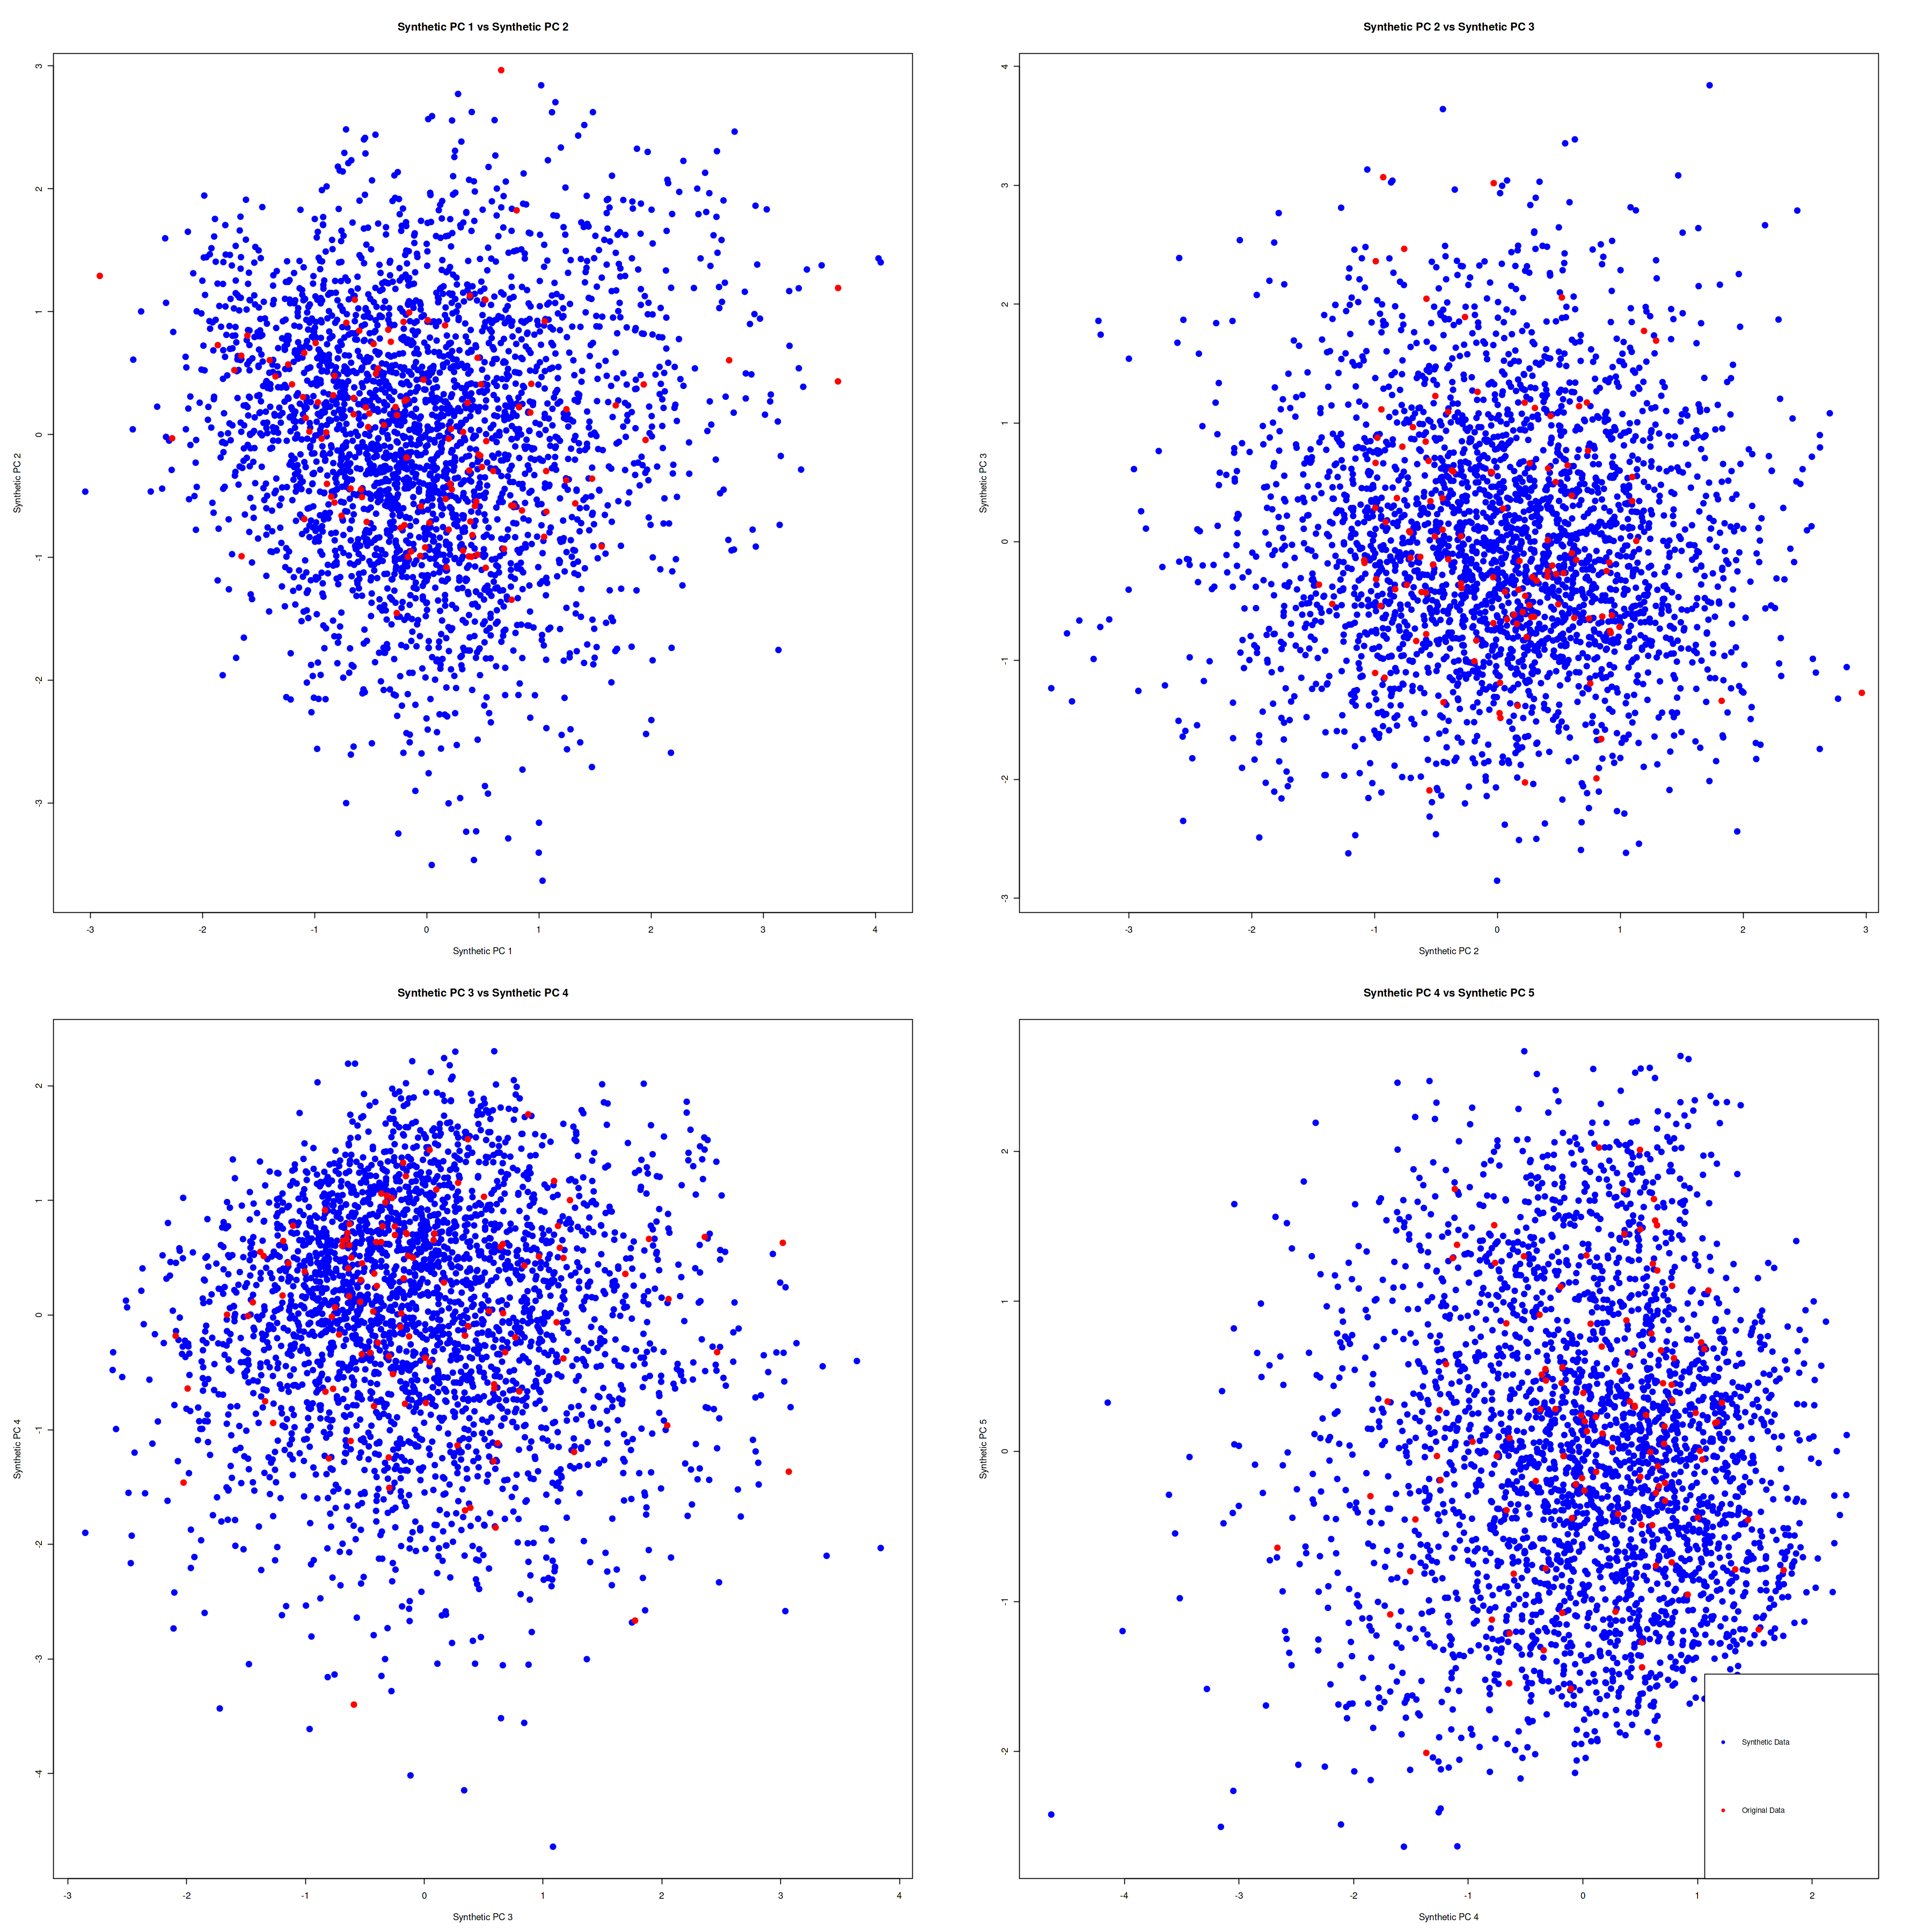

In [39]:
pca_scatterplot <- function(train_pca, original_pca) {
    
  par(mfrow = c(2, 2),  mar = c(5, 5, 5, 5))
    
  options(repr.plot.width = 30, repr.plot.height = 30)
  
  for (i in 1:4) {
    plot(train_pca[, i], train_pca[, i+1], 
         xlab = paste("Synthetic PC", i), ylab = paste("Synthetic PC", i+1),
         main = paste("Synthetic PC", i, "vs", "Synthetic PC", i+1),
         pch = 16, col = "blue", cex = 1.5)
    
    points(original_pca[, i], original_pca[, i+1], pch = 16, col = "red", cex = 1.5)
  }
  legend("bottomright", legend = c("Synthetic Data", "Original Data"), 
         pch = 16, col = c("blue", "red"), cex = 0.8)
}

pca_scatterplot(train_pca, original_pca)

In the scatterplots above, we can see that the datasets are homogenous because there are no clusters and the points from both the synthetic and original data are spread out.

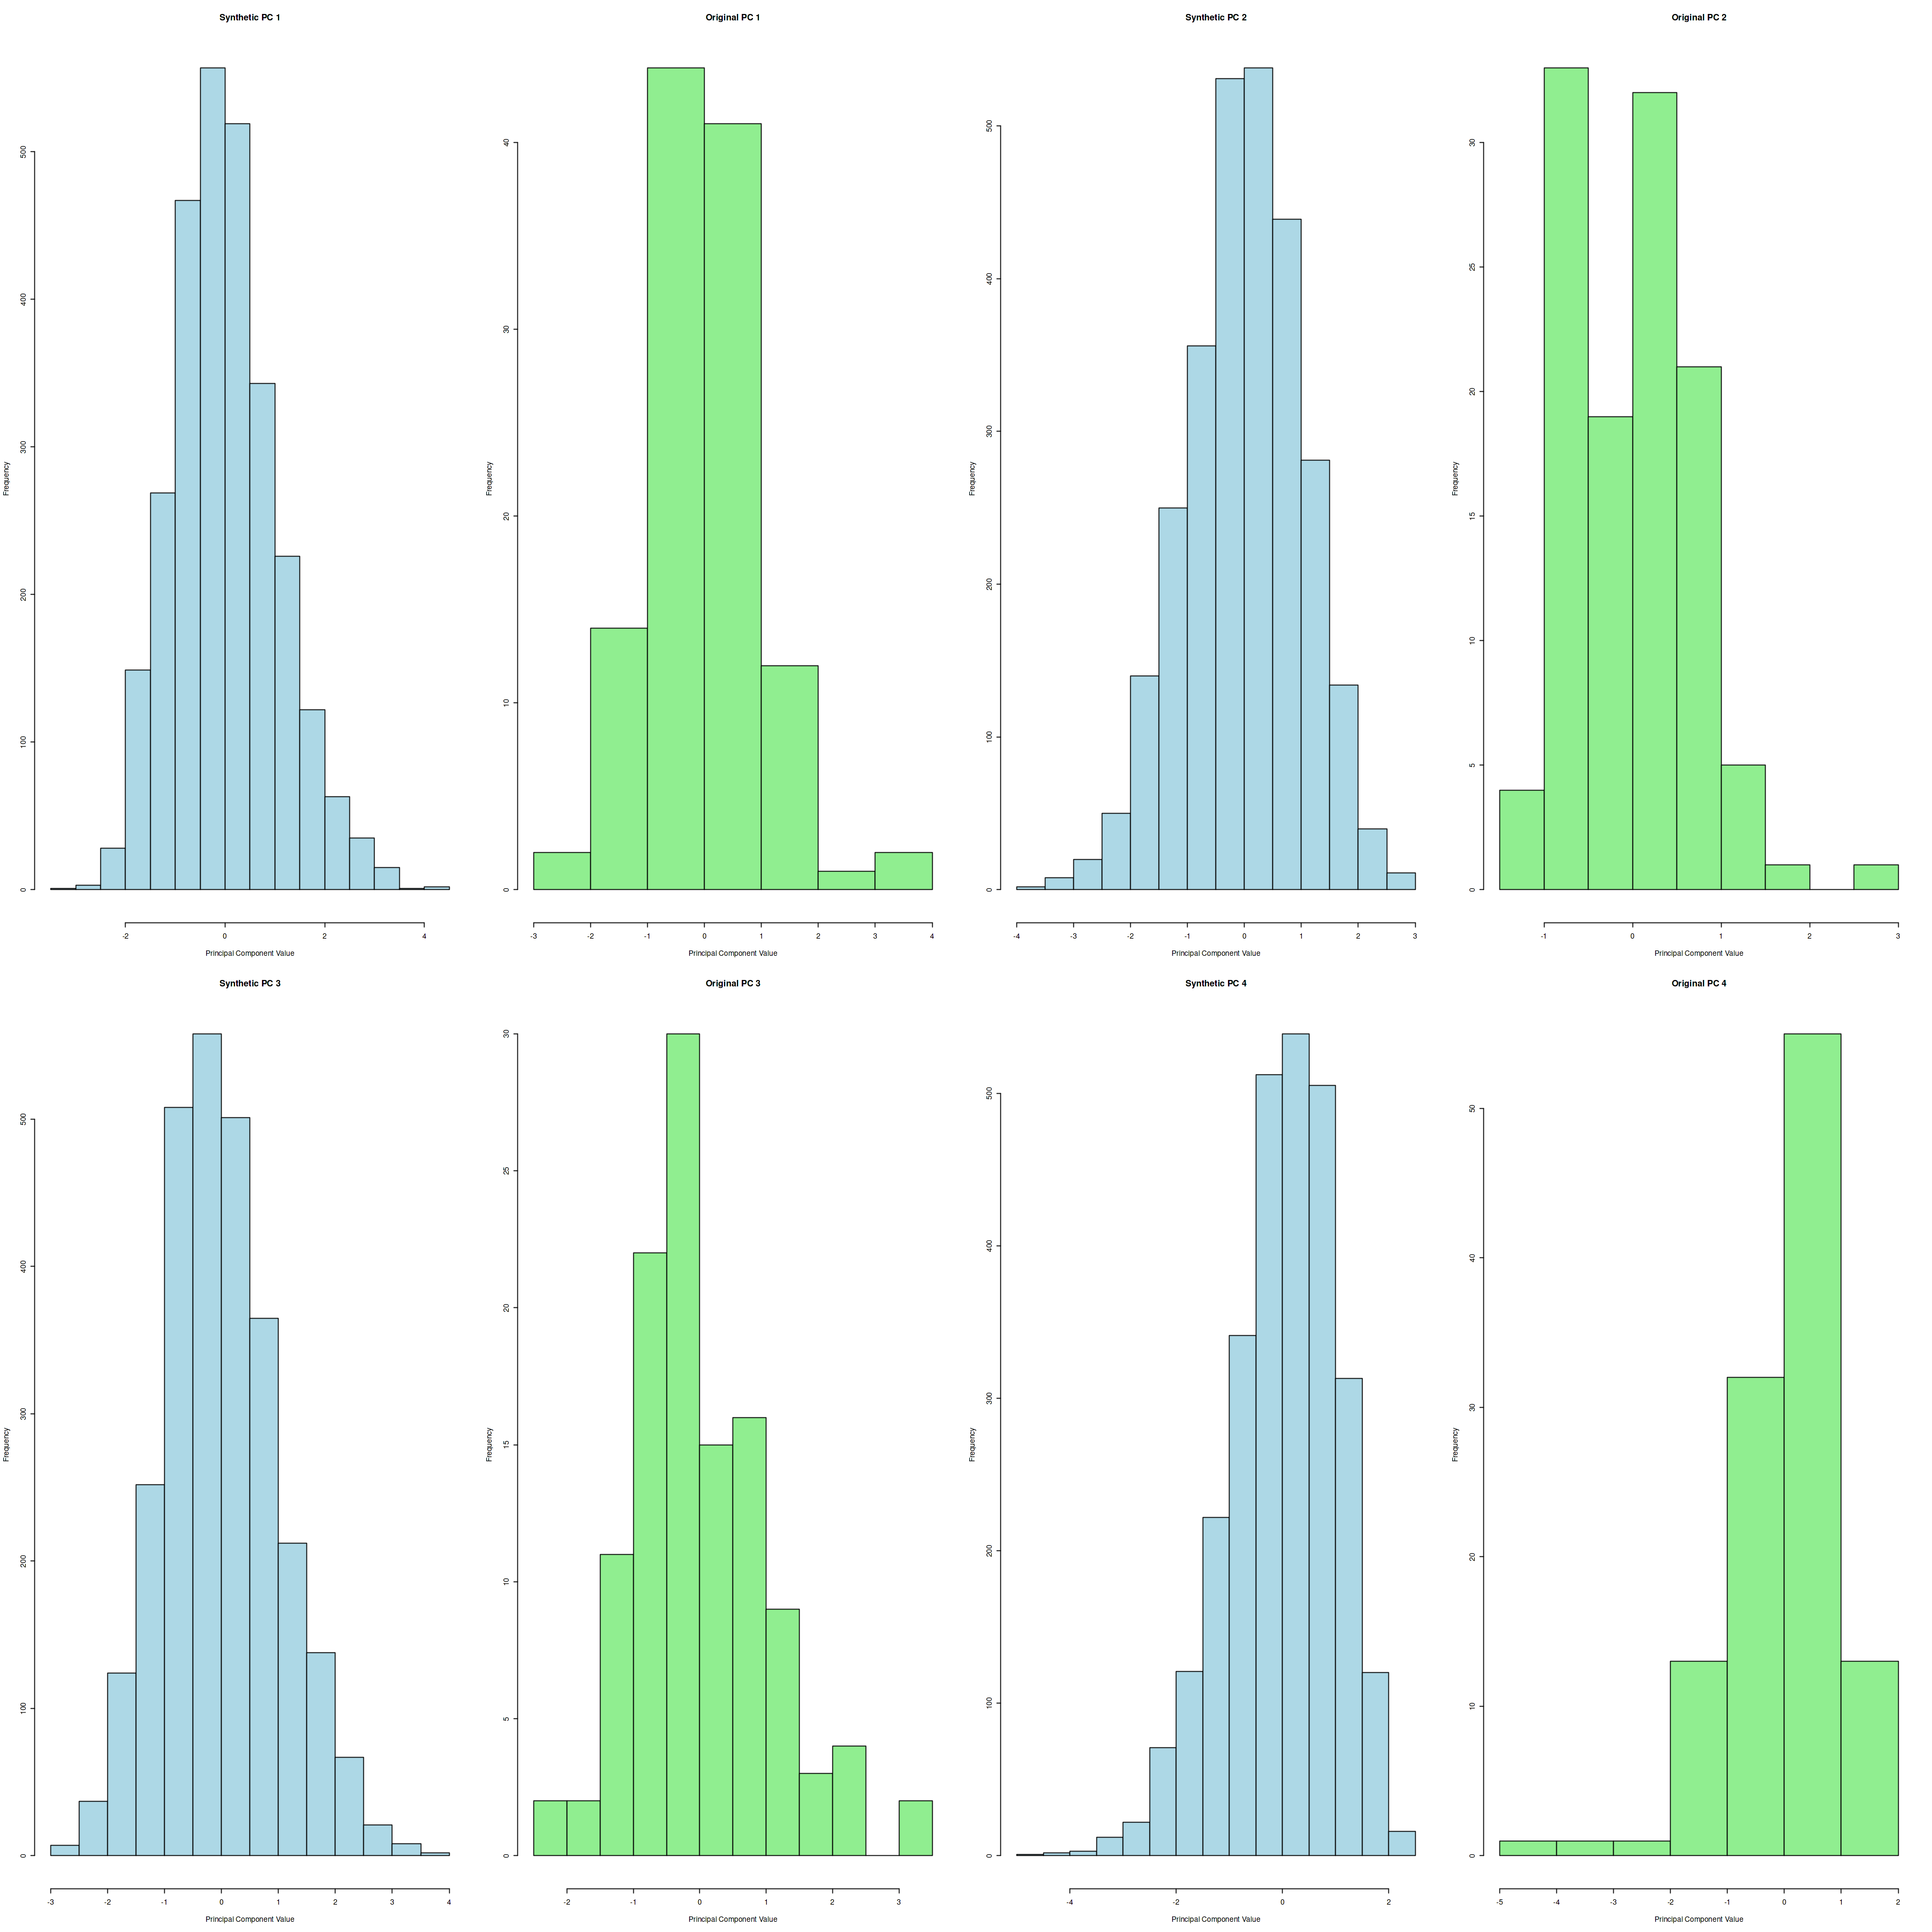

In [40]:
plot_pca <- function(train_pca, original_pca) {
  par(mfrow = c(2, 4))  
  
  for (i in 1:4) {
    hist(train_pca[, i], 
         main = paste("Synthetic PC", i), 
         xlab = "Principal Component Value",
         col = "lightblue", 
         border = "black")
    
    hist(original_pca[, i], 
         main = paste("Original PC", i), 
         xlab = "Principal Component Value",
         col = "lightgreen", 
         border = "black")
  }
}

plot_pca(train_pca, original_pca)

Looking at the histograms above, we can see that the shapes for both the synthetic and original data are very similar. They exhibit similar distribution shapes with centers that are close or aligned. Also, the spread of the histograms are similar, further indicating homogeneity.


We can also find the variance explained by each principal component (PC).

In [41]:
# Calculate the variance explained by each principal component
variance_explained <- (pca_result$sdev)^2
variance_explained

[1] 1.0554052 1.0518554 1.0336469 1.0165072 1.0005579 0.9842718 0.9646444
[8] 0.9609623 0.9321489

In [42]:
# Calculate the total variance
total_variance <- sum(variance_explained)
total_variance

[1] 9

In [43]:
# Calculate the proportion of variance explained by each principal component
proportion_variance_explained <- variance_explained / total_variance
proportion_variance_explained

[1] 0.1172672 0.1168728 0.1148497 0.1129452 0.1111731 0.1093635 0.1071827
[8] 0.1067736 0.1035721

In [44]:
variance_explained_df <- data.frame(
  PC = 1:length(variance_explained),
  Variance_Explained = variance_explained,
  Proportion_Variance_Explained = proportion_variance_explained
)

variance_explained_df

PC,Variance_Explained,Proportion_Variance_Explained
<int>,<dbl>,<dbl>
1,1.0554052,0.1172672
2,1.0518554,0.1168728
3,1.0336469,0.1148497
4,1.0165072,0.1129452
5,1.0005579,0.1111731
6,0.9842718,0.1093635
7,0.9646444,0.1071827
8,0.9609623,0.1067736
9,0.9321489,0.1035721


The variance explained by each PC can reveal how much of the total variability in the dataset is captured by each PC. This information can be useful to understand the underlying structure of the data because components that explain a large amount of variance may represent important patterns or relationships. By better understanding the data, we can make better decisions in terms of feature selection and model building.

### Logistic Regression Model

In [45]:
glm.model <- glm(Classification ~ ., data = training_data, family = binomial)

summary(glm.model)


Call:
glm(formula = Classification ~ ., family = binomial, data = training_data)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.381  -1.255   1.049   1.097   1.186  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)
(Intercept)  5.048e-01  3.595e-01   1.404    0.160
Age         -8.929e-04  2.142e-03  -0.417    0.677
BMI         -6.768e-03  8.669e-03  -0.781    0.435
Glucose     -1.259e-03  1.467e-03  -0.858    0.391
Insulin     -4.904e-03  5.851e-03  -0.838    0.402
HOMA        -3.847e-03  2.364e-02  -0.163    0.871
Leptin      -9.507e-04  2.483e-03  -0.383    0.702
Adiponectin  3.898e-03  8.106e-03   0.481    0.631
Resistin     6.663e-03  5.207e-03   1.280    0.201
MCP.1        4.693e-05  1.514e-04   0.310    0.757

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3854.4  on 2799  degrees of freedom
Residual deviance: 3850.1  on 2790  degrees of freedom
AIC: 3870.1

Number of Fisher Scoring iterations: 3


In [46]:
# Predict on validation data
glm.probs <- predict(glm.model, val.X, type = "response") 

head(glm.probs)

1         2         3         4         5         6 
0.5617140 0.5608973 0.5588253 0.5694397 0.5606022 0.5261208

In [47]:
# Get performance measures
num_test <- length(glm.probs) 
glm.pred <- rep(0, num_test) 
glm.pred[glm.probs > 0.5] <- 1

# Confusion matrix
table(glm.pred, val.y)

        val.y
glm.pred   1   2
       0   0   2
       1 522 676

In [48]:
# Validation error
mean(glm.pred != val.y)

[1] 0.565

In [49]:
# Accuracy score
1 - mean(glm.pred != val.y)

[1] 0.435

In [50]:
# Predict on test data
glm.probs_test <- predict(glm.model, test.X, type = "response") 

head(glm.probs_test)

1         2         3         4         5         6 
0.5749235 0.5544364 0.5726687 0.5821229 0.5665884 0.5774556

In [51]:
# Get performance measures
num_test <- length(glm.probs_test) 
glm.pred_test <- rep(0, num_test) 
glm.pred_test[glm.probs_test > 0.5] <- 1

# Confusion matrix
confusion_matrix <- table(glm.pred_test, test.y)
confusion_matrix

             test.y
glm.pred_test  1  2
            0  0  7
            1 52 57

Test error:

In [52]:
mean(glm.pred_test != test.y)

[1] 0.5517241

Validation error:

In [53]:
mean(glm.pred != val.y)

[1] 0.565

In [54]:
accuracy_score <- 1 - mean(glm.pred != val.y)
accuracy_score

[1] 0.435

In [55]:
precision <- confusion_matrix[2, 2] / sum(confusion_matrix[, 2])
precision

[1] 0.890625

In [56]:
recall <- confusion_matrix[2, 2] / sum(confusion_matrix[2, ])
recall

[1] 0.5229358

In [57]:
F1_score <- (2*precision*recall)/(precision+recall)
F1_score

[1] 0.6589595

### KNN Model

In [58]:
# Define N
N <- nrow(training_data)

# Define initial k
k_initial <- ceiling(sqrt(N))
k_initial

[1] 53

In [59]:
# Load library
library(class)

In [60]:
# Ensure reproducibility of results
set.seed(1)

# Standardize X
standardized_X <- scale(data[, -which(colnames(data) == "Classification")])

# Split train test X standardized
X_train_std <- standardized_X[train_index, ] 
X_val_std <- standardized_X[-train_index, ]

# Train and test KNN with K=k_initial
knn.pred <- knn(X_train_std, X_val_std, train.y, k = k_initial)

Confusion matrix:

In [61]:
table(knn.pred, val.y)

        val.y
knn.pred   1   2
       1 120 143
       2 402 535

Validation error:

In [62]:
val_error <- mean(knn.pred != val.y)
val_error

[1] 0.4541667

In [63]:
knn.pred_test <- knn(X_train_std, test.X, train.y, k = k_initial)

confusion_matrix <- table(knn.pred_test, test.y)
confusion_matrix

             test.y
knn.pred_test  1  2
            1  2  3
            2 50 61

Test error:

In [64]:
test_error <- mean(knn.pred_test != test.y)
test_error

[1] 0.4568966

In [65]:
accuracy_score <- 1 - val_error
accuracy_score

[1] 0.5458333

In [66]:
precision <- confusion_matrix[2, 2] / sum(confusion_matrix[, 2])
precision

[1] 0.953125

In [67]:
recall <- confusion_matrix[2, 2] / sum(confusion_matrix[2, ])
recall

[1] 0.5495495

In [68]:
F1_score <- (2*precision*recall)/(precision+recall)
F1_score

[1] 0.6971429

### LDA Model

In [69]:
library(MASS)


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




In [70]:
lda.fit <- lda(Classification ~ ., data=training_data)

lda.fit

Call:
lda(Classification ~ ., data = training_data)

Prior probabilities of groups:
        1         2 
0.4507143 0.5492857 

Group means:
       Age      BMI  Glucose  Insulin     HOMA   Leptin Adiponectin Resistin
1 56.62044 27.48681 114.1426 8.881905 2.018529 25.43152    9.380178 12.79048
2 56.31079 27.35600 113.3505 8.679793 2.010116 25.21195    9.461455 13.13116
     MCP.1
1 510.3891
2 513.6105

Coefficients of linear discriminants:
                     LD1
Age         -0.011410056
BMI         -0.086456034
Glucose     -0.016065716
Insulin     -0.062768974
HOMA        -0.049015265
Leptin      -0.012148581
Adiponectin  0.049752176
Resistin     0.084909832
MCP.1        0.000599353

Plotting the linear discriminants:

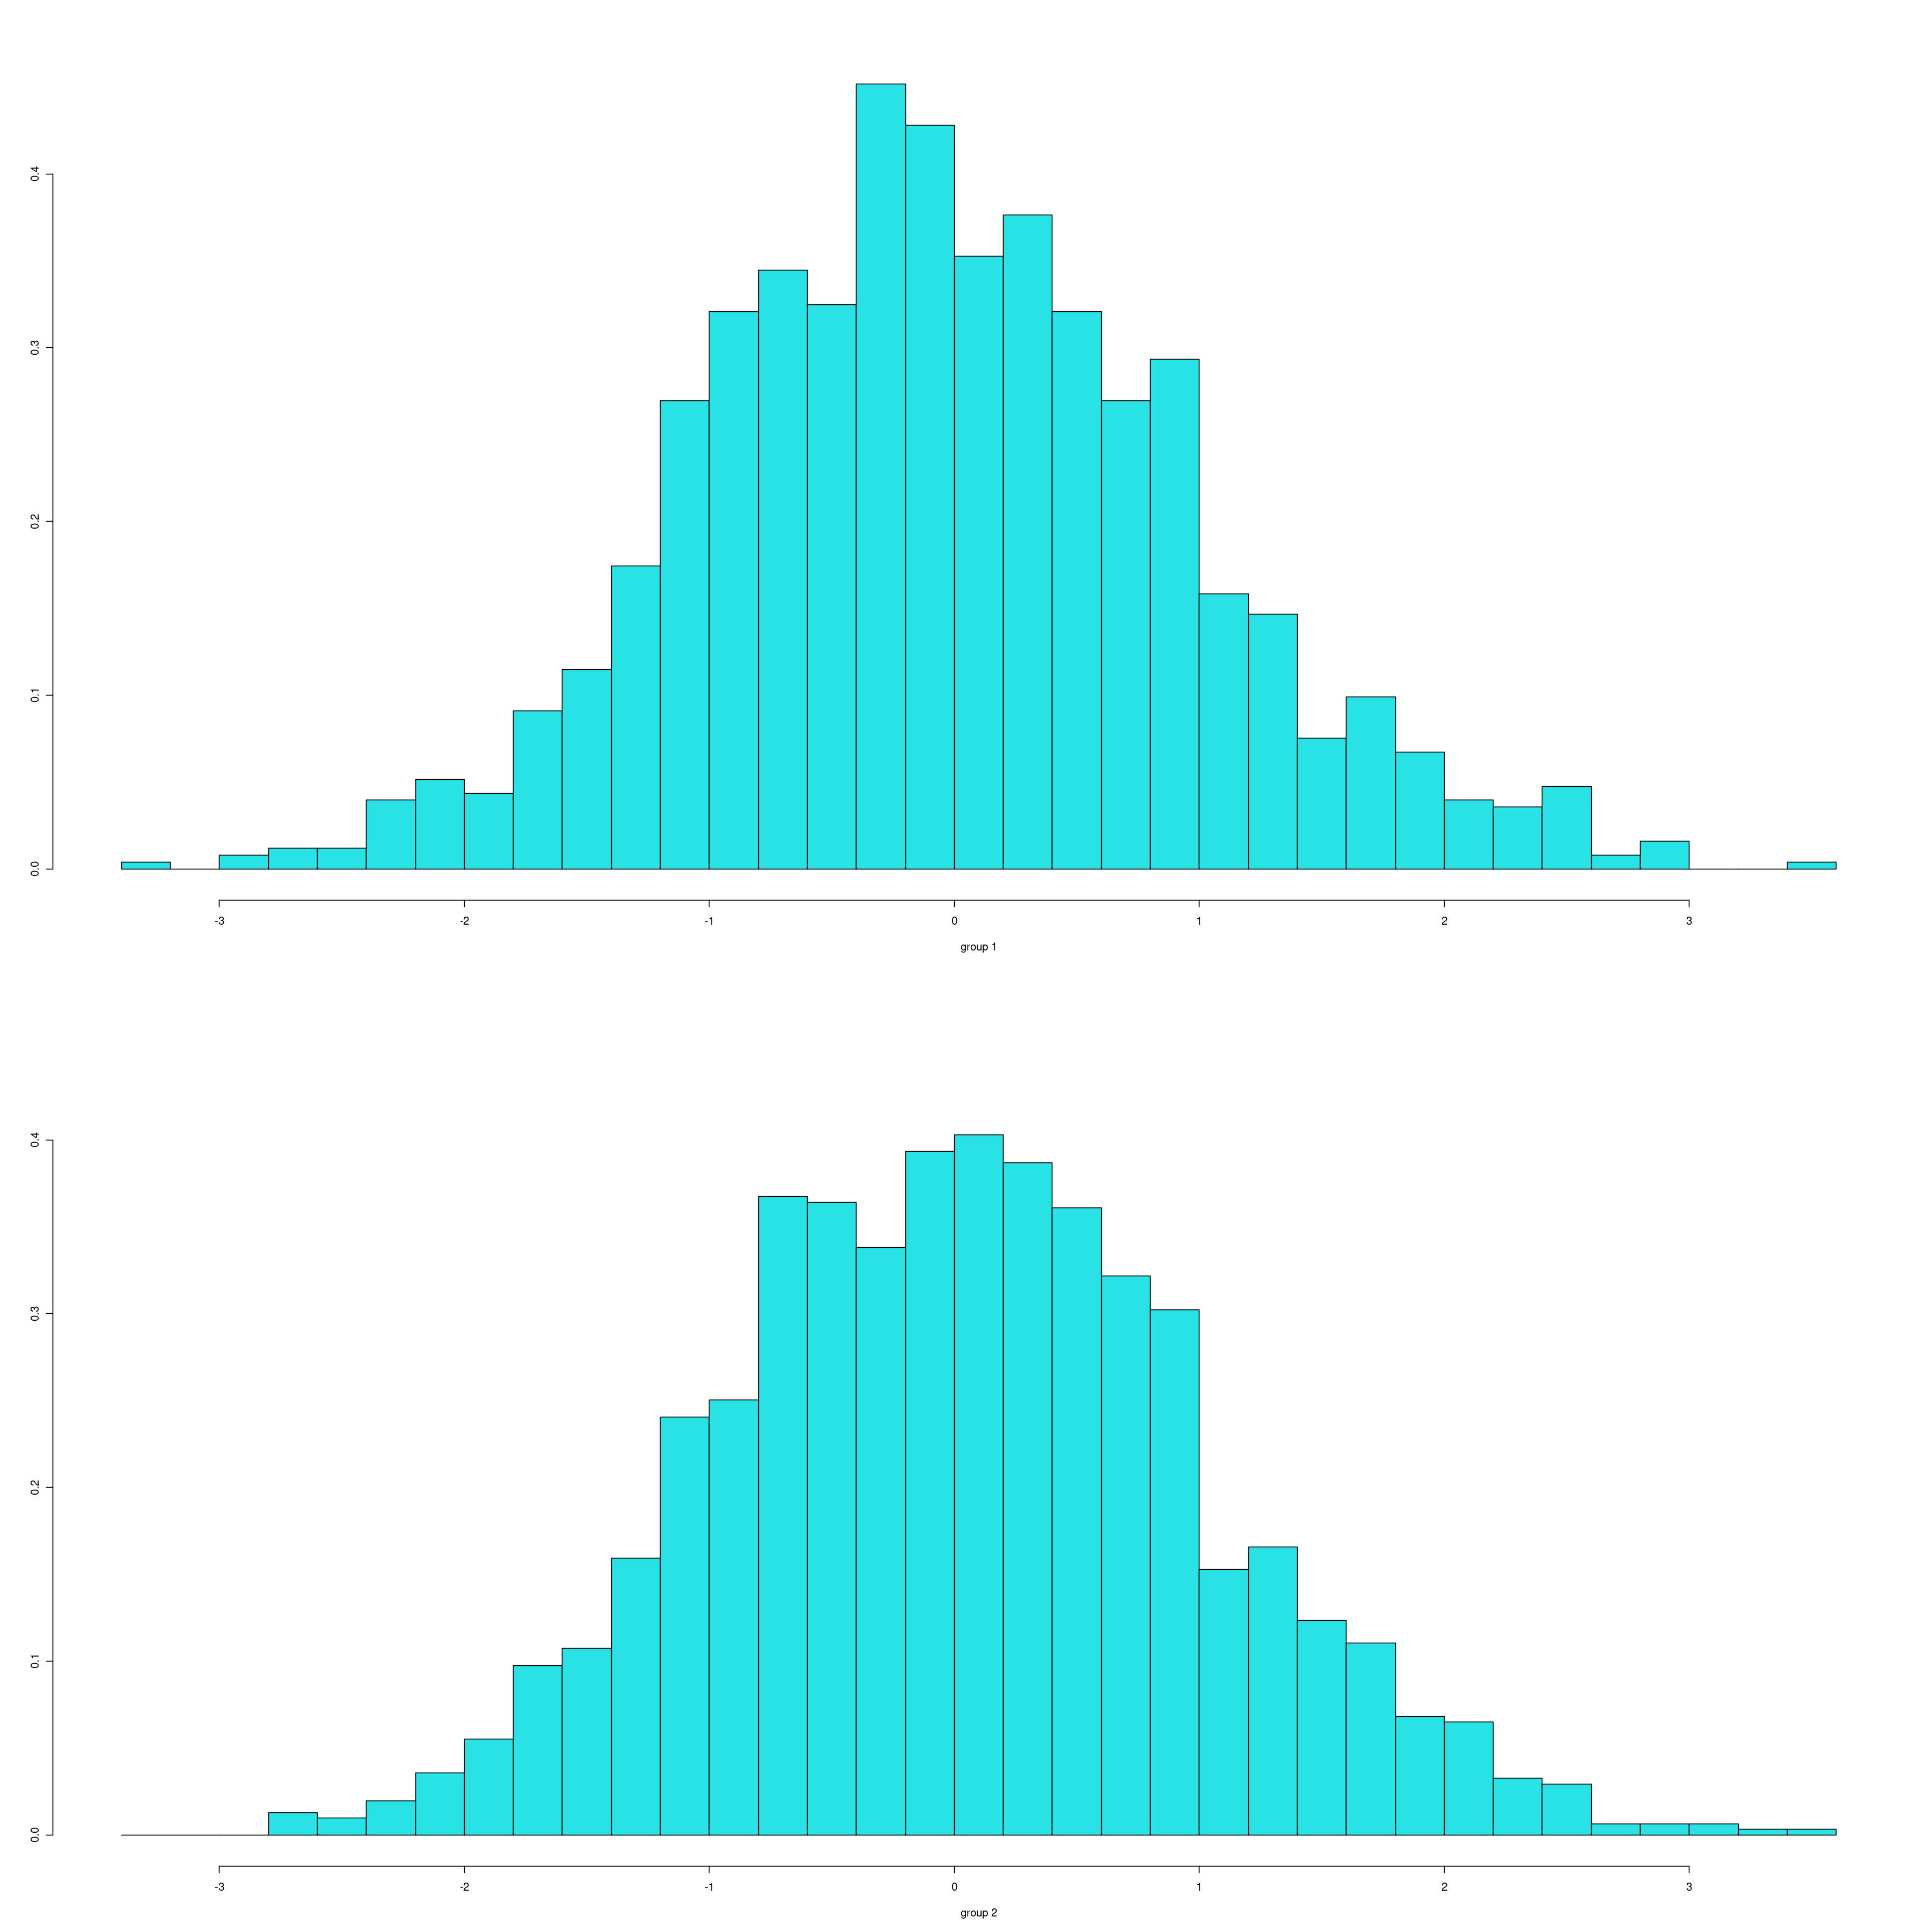

In [71]:
plot(lda.fit)

In [72]:
# Predict output for test set
lda.pred <- predict(lda.fit, val.X)

# predict() returns the class, posterior probabilities and the linear discriminants
names(lda.pred)

[1] "class"     "posterior" "x"

Confusion matrix:

In [73]:
lda.class <- lda.pred$class

table(lda.class, val.y)

         val.y
lda.class   1   2
        1   0   2
        2 522 676

Validation error:

In [74]:
val_error <- mean(lda.class != val.y)
val_error

[1] 0.4366667

In [75]:
# Predict output for test set
lda.pred_test <- predict(lda.fit, test.X)

lda.class_test <- lda.pred_test$class

confusion_matrix <- table(lda.class_test, test.y)
confusion_matrix

              test.y
lda.class_test  1  2
             1  0  7
             2 52 57

Test Error:

In [76]:
test_error <- mean(lda.class_test != test.y)
test_error

[1] 0.5086207

In [77]:
accuracy_score <- 1 - val_error
accuracy_score

[1] 0.5633333

In [78]:
precision <- confusion_matrix[2, 2] / sum(confusion_matrix[, 2])
precision

[1] 0.890625

In [79]:
recall <- confusion_matrix[2, 2] / sum(confusion_matrix[2, ])
recall

[1] 0.5229358

In [80]:
F1_score <- (2*precision*recall)/(precision+recall)
F1_score

[1] 0.6589595

### QDA Model

In [81]:
qda.fit <- qda(Classification ~ ., data=training_data)
qda.fit

Call:
qda(Classification ~ ., data = training_data)

Prior probabilities of groups:
        1         2 
0.4507143 0.5492857 

Group means:
       Age      BMI  Glucose  Insulin     HOMA   Leptin Adiponectin Resistin
1 56.62044 27.48681 114.1426 8.881905 2.018529 25.43152    9.380178 12.79048
2 56.31079 27.35600 113.3505 8.679793 2.010116 25.21195    9.461455 13.13116
     MCP.1
1 510.3891
2 513.6105

Confusion matrix:

In [82]:
qda.class <- predict(qda.fit, val.X)$class

table(qda.class, val.y)

         val.y
qda.class   1   2
        1 100 129
        2 422 549

Valdiation error:

In [83]:
val_error <- mean(qda.class != val.y)
val_error

[1] 0.4591667

In [84]:
qda.class_test <- predict(qda.fit, test.X)$class

confusion_matrix <- table(qda.class_test, test.y)
confusion_matrix

              test.y
qda.class_test  1  2
             1  7 16
             2 45 48

Test error:

In [85]:
test_error <- mean(qda.class_test != test.y)
test_error

[1] 0.5258621

In [86]:
accuracy_score <- 1 - val_error
accuracy_score

[1] 0.5408333

In [87]:
precision <- confusion_matrix[2, 2] / sum(confusion_matrix[, 2])
precision

[1] 0.75

In [88]:
recall <- confusion_matrix[2, 2] / sum(confusion_matrix[2, ])
recall

[1] 0.516129

In [89]:
F1_score <- (2*precision*recall)/(precision+recall)
F1_score

[1] 0.611465

## 6. Experimentation

At this stage of the project, various experimentation will be conducted to optimize the baseline model. In addition, this optimized model is evaluated based on multiple metrics. This section covers the following:
- Hyperparameter tuning
- Feature importance
- Confusion matrix
- Cross-validation
- Precision
- Recall
- F1 score
- Classification report
- ROC curve
- Area under the curve (AUC)

**Hyperparameter Tuning for Logistic Regression Model**

In [90]:
library(caret)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress




Define the parameter grid:

In [91]:
param_grid <- expand.grid(
  alpha = seq(0, 1, by = 0.1),  
  lambda = c(0.01, 0.1, 1)  
)

In [92]:
ctrl <- trainControl(method = "cv", number = 5)  

glm_tuned <- train(
  Classification ~ ., 
  data = training_data, 
  method = "glmnet",  
  tuneGrid = param_grid,  
  family = "binomial",  
  trControl = ctrl,
  verbose = FALSE  
)

print(glm_tuned)

glmnet 

2800 samples
   9 predictor
   2 classes: '1', '2' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 2240, 2240, 2240, 2240, 2240 
Resampling results across tuning parameters:

  alpha  lambda  Accuracy   Kappa       
  0.0    0.01    0.5492857   0.000000000
  0.0    0.10    0.5492857   0.000000000
  0.0    1.00    0.5492857   0.000000000
  0.1    0.01    0.5496429   0.001940389
  0.1    0.10    0.5492857   0.000000000
  0.1    1.00    0.5492857   0.000000000
  0.2    0.01    0.5485714  -0.001122608
  0.2    0.10    0.5492857   0.000000000
  0.2    1.00    0.5492857   0.000000000
  0.3    0.01    0.5492857   0.000000000
  0.3    0.10    0.5492857   0.000000000
  0.3    1.00    0.5492857   0.000000000
  0.4    0.01    0.5492857   0.000000000
  0.4    0.10    0.5492857   0.000000000
  0.4    1.00    0.5492857   0.000000000
  0.5    0.01    0.5492857   0.000000000
  0.5    0.10    0.5492857   0.000000000
  0.5    1.00    0.5492857   0.000000000
  

In [93]:
best_alpha <- glm_tuned$bestTune$alpha
best_lambda <- glm_tuned$bestTune$lambda

final_glm_model <- glmnet::glmnet(x = model.matrix(~ ., data = train.X)[, -1], 
                                  y = as.factor(train.y), 
                                  alpha = best_alpha, lambda = best_lambda, family = "binomial")

Make predictions on valdiation data and convert probabilities to class predictions:

In [94]:
glm_probs <- predict(final_glm_model, newx = model.matrix(~ ., data = val.X)[, -1], 
                     type = "response")

glm_pred <- ifelse(glm_probs > 0.5, 1, 0)

Evaluate the final model:

In [95]:
confusion_matrix_glm <- table(glm_pred, val.y)
confusion_matrix_glm

        val.y
glm_pred   1   2
       0   0   2
       1 522 676

In [96]:
validation_error <- mean(glm_pred != val.y)
validation_error

[1] 0.565

In [97]:
accuracy_score <- 1 - validation_error
accuracy_score

[1] 0.435

In [98]:
precision <- confusion_matrix_glm[2, 2] / sum(confusion_matrix_glm[, 2])
precision

[1] 0.9970501

In [99]:
recall <- confusion_matrix_glm[2, 2] / sum(confusion_matrix_glm[2, ])
recall

[1] 0.5642738

In [100]:
F1_score <- (2*precision*recall)/(precision+recall)
F1_score

[1] 0.7206823

Make predictions on the test set.

In [101]:
glm_probs_test <- predict(final_glm_model, newx = model.matrix(~ ., data = test.X)[, -1], 
                     type = "response")

glm_pred_test <- ifelse(glm_probs_test > 0.5, 1, 0)

Evaluate the final model on the test set:

In [102]:
confusion_matrix_glm_test <- table(glm_pred_test, test.y)
confusion_matrix_glm_test

             test.y
glm_pred_test  1  2
            0  0  1
            1 52 63

In [103]:
validation_error_test <- mean(glm_pred_test != test.y)
validation_error_test

[1] 0.5517241

In [104]:
accuracy_score_test <- 1 - validation_error_test
accuracy_score_test

[1] 0.4482759

In [105]:
precision_test <- confusion_matrix_glm_test[2, 2] / sum(confusion_matrix_glm_test[, 2])
precision_test

[1] 0.984375

In [106]:
recall_test <- confusion_matrix_glm_test[2, 2] / sum(confusion_matrix_glm_test[2, ])
recall_test

[1] 0.5478261

In [107]:
F1_score_test <- (2*precision_test*recall_test)/(precision_test+recall_test)
F1_score_test

[1] 0.7039106

**Hyperparameter Tuning for KNN Model**

Define the parameter grid:

In [108]:
param_grid <- expand.grid(
  k = seq(1, 20, by = 1)  
)

In [109]:
ctrl <- trainControl(method = "cv", number = 5)  

knn_tuned <- train(
  Classification ~ ., 
  data = training_data, 
  method = "knn",  
  trControl = ctrl,  
  tuneGrid = param_grid  
)

print(knn_tuned)

k-Nearest Neighbors 

2800 samples
   9 predictor
   2 classes: '1', '2' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 2240, 2240, 2239, 2241, 2240 
Resampling results across tuning parameters:

  k   Accuracy   Kappa       
   1  0.5064241   0.001447358
   2  0.5110644   0.011458282
   3  0.5042813  -0.007529484
   4  0.5064254  -0.002346290
   5  0.4996320  -0.019051147
   6  0.4971410  -0.022275439
   7  0.5071493  -0.002628096
   8  0.5035683  -0.008474682
   9  0.5267909   0.036325799
  10  0.5182137   0.018410897
  11  0.5235689   0.028489149
  12  0.5192889   0.018818458
  13  0.5250071   0.027846722
  14  0.5214222   0.020571473
  15  0.5253610   0.023987570
  16  0.5246455   0.023241965
  17  0.5207137   0.011829939
  18  0.5232118   0.016603147
  19  0.5210791   0.010485084
  20  0.5121505  -0.007891532

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 9.


Get the best hyperparameters:

In [110]:
best_k <- knn_tuned$bestTune$k

final_knn_model <- knn(
  train = model.matrix(~ ., data = training_data)[, -1], 
  test = model.matrix(~ ., data = val_data)[, -1], 
  cl = train.y, 
  k = best_k
)

Make predictions on validation data and evaluate model:

In [111]:
knn_pred <- final_knn_model

accuracy <- mean(knn_pred == val.y)
accuracy

[1] 0.51

In [112]:
confusion_matrix_knn <- table(knn_pred, val.y)
confusion_matrix_knn

        val.y
knn_pred   1   2
       1 214 280
       2 308 398

In [113]:
validation_error <- mean(knn_pred != val.y)
validation_error

[1] 0.49

In [114]:
precision <- confusion_matrix_knn[2, 2] / sum(confusion_matrix_knn[, 2])
precision

[1] 0.5870206

In [115]:
recall <- confusion_matrix_knn[2, 2] / sum(confusion_matrix_knn[2, ])
recall

[1] 0.5637394

In [116]:
F1_score <- (2*precision*recall)/(precision+recall)
F1_score

[1] 0.5751445

Evaluation on test set

In [117]:
final_knn_model_test <- knn(
  train = model.matrix(~ ., data = training_data)[, -1], 
  test = model.matrix(~ ., data = test_data)[, -1], 
  cl = train.y, 
  k = best_k
)

In [118]:
knn_pred_test <- final_knn_model_test

accuracy_test <- mean(knn_pred_test == test.y)
accuracy_test

[1] 0.5172414

In [119]:
confusion_matrix_knn_test <- table(knn_pred_test, test.y)
confusion_matrix_knn_test

             test.y
knn_pred_test  1  2
            1 19 23
            2 33 41

In [120]:
validation_error_test <- mean(knn_pred_test != test.y)
validation_error_test

[1] 0.4827586

In [121]:
precision_test <- confusion_matrix_knn_test[2, 2] / sum(confusion_matrix_knn_test[, 2])
precision_test

[1] 0.640625

In [122]:
recall_test <- confusion_matrix_knn_test[2, 2] / sum(confusion_matrix_knn_test[2, ])
recall_test

[1] 0.5540541

In [123]:
F1_score_test <- (2*precision_test*recall_test)/(precision_test+recall_test)
F1_score_test

[1] 0.5942029

**Hyperparameter Tuning for LDA Model**

With LDA, there are typically no tuning parameters to optimize using hyperparameter tuning in the same way as some other models like KNN. LDA mainly relies on estimates of class means and covariance matrices. However, we can experiment with different values of the shrinkage parameter in LDA to see if it improves the performance of the model. Below we will train multiple LDA models with different values of the shrinkage parameter and evaluate their performance.

In [124]:
shrinkage_values <- seq(0, 1, by = 0.1)  

Train multiple LDA models with different shrinkage values:

In [125]:
validation_errors <- numeric(length(shrinkage_values))
accuracies <- numeric(length(shrinkage_values))
recalls <- numeric(length(shrinkage_values))
precisions <- numeric(length(shrinkage_values))
F1_scores <- numeric(length(shrinkage_values))
confusion_matrices <- list()

In [126]:
for (i in seq_along(shrinkage_values)) {
  shrinkage <- shrinkage_values[i]
  
  lda_fit <- lda(Classification ~ ., data = training_data, shrinkage = shrinkage)
  lda_pred <- predict(lda_fit, newdata = val.X)$class
  
  validation_errors[i] <- mean(lda_pred != val.y)
  accuracies[i] <- mean(lda_pred == val.y)
  
  confusion_matrix <- table(lda_pred, val.y)
    
  precision <- confusion_matrix[2, 2] / sum(confusion_matrix[, 2])
  precisions[i] <- precision
  
  recall <- confusion_matrix[2, 2] / sum(confusion_matrix[2, ])
  recalls[i] <- recall

  F1_score <- (2*precision*recall)/(precision+recall)
  F1_scores[i] <- F1_score
    
  confusion_matrices[[i]] <- confusion_matrix
  
}

Evaluate model at each shrinkage value:

In [127]:
for (i in seq_along(shrinkage_values)) {
  cat("Shrinkage value:", shrinkage_values[i], "\n")
  cat("Validation Error:", validation_errors[i], "\n")
  cat("Accuracy:", accuracies[i], "\n")
  cat("Recall:", recalls[i], "\n")
  cat("Precision:", precisions[i], "\n")
  cat("F1 Score:", F1_scores[i], "\n")
  cat("Confusion Matrix:\n")
  print(confusion_matrices[[i]])
}


Shrinkage value: 0 
Validation Error: 0.4366667 
Accuracy: 0.5633333 
Recall: 0.5642738 
Precision: 0.9970501 
F1 Score: 0.7206823 
Confusion Matrix:
        val.y
lda_pred   1   2
       1   0   2
       2 522 676
Shrinkage value: 0.1 
Validation Error: 0.4366667 
Accuracy: 0.5633333 
Recall: 0.5642738 
Precision: 0.9970501 
F1 Score: 0.7206823 
Confusion Matrix:
        val.y
lda_pred   1   2
       1   0   2
       2 522 676
Shrinkage value: 0.2 
Validation Error: 0.4366667 
Accuracy: 0.5633333 
Recall: 0.5642738 
Precision: 0.9970501 
F1 Score: 0.7206823 
Confusion Matrix:
        val.y
lda_pred   1   2
       1   0   2
       2 522 676
Shrinkage value: 0.3 
Validation Error: 0.4366667 
Accuracy: 0.5633333 
Recall: 0.5642738 
Precision: 0.9970501 
F1 Score: 0.7206823 
Confusion Matrix:
        val.y
lda_pred   1   2
       1   0   2
       2 522 676
Shrinkage value: 0.4 
Validation Error: 0.4366667 
Accuracy: 0.5633333 
Recall: 0.5642738 
Precision: 0.9970501 
F1 Score: 0.7206823 


The varying shrinkage valeus did not affect the resulting validation error, accuracy, recall, or precision. Therefore, all the LDA models have a similar performance. 

Train multiple LDA models with different shrinkage values:

In [128]:
validation_errors_test <- numeric(length(shrinkage_values))
accuracies_test <- numeric(length(shrinkage_values))
recalls_test <- numeric(length(shrinkage_values))
precisions_test <- numeric(length(shrinkage_values))
F1_scores_test <- numeric(length(shrinkage_values))
confusion_matrices_test <- list()

In [129]:
for (i in seq_along(shrinkage_values)) {
  shrinkage <- shrinkage_values[i]
  
  lda_fit <- lda(Classification ~ ., data = training_data, shrinkage = shrinkage)
  lda_pred <- predict(lda_fit, newdata = test.X)$class
  
  validation_errors_test[i] <- mean(lda_pred != test.y)
  accuracies_test[i] <- mean(lda_pred == test.y)
  
  confusion_matrix <- table(lda_pred, test.y)
    
  precision <- confusion_matrix[2, 2] / sum(confusion_matrix[, 2])
  precisions_test[i] <- precision
  
  recall <- confusion_matrix[2, 2] / sum(confusion_matrix[2, ])
  recalls_test[i] <- recall

  F1_score <- (2*precision*recall)/(precision+recall)
  F1_scores_test[i] <- F1_score
    
  confusion_matrices_test[[i]] <- confusion_matrix
  
}

In [130]:
for (i in seq_along(shrinkage_values)) {
  cat("Shrinkage value:", shrinkage_values[i], "\n")
  cat("Validation Error:", validation_errors_test[i], "\n")
  cat("Accuracy:", accuracies_test[i], "\n")
  cat("Recall:", recalls_test[i], "\n")
  cat("Precision:", precisions_test[i], "\n")
  cat("F1 Score:", F1_scores_test[i], "\n")
  cat("Confusion Matrix:\n")
  print(confusion_matrices_test[[i]])
}


Shrinkage value: 0 
Validation Error: 0.5086207 
Accuracy: 0.4913793 
Recall: 0.5229358 
Precision: 0.890625 
F1 Score: 0.6589595 
Confusion Matrix:
        test.y
lda_pred  1  2
       1  0  7
       2 52 57
Shrinkage value: 0.1 
Validation Error: 0.5086207 
Accuracy: 0.4913793 
Recall: 0.5229358 
Precision: 0.890625 
F1 Score: 0.6589595 
Confusion Matrix:
        test.y
lda_pred  1  2
       1  0  7
       2 52 57
Shrinkage value: 0.2 
Validation Error: 0.5086207 
Accuracy: 0.4913793 
Recall: 0.5229358 
Precision: 0.890625 
F1 Score: 0.6589595 
Confusion Matrix:
        test.y
lda_pred  1  2
       1  0  7
       2 52 57
Shrinkage value: 0.3 
Validation Error: 0.5086207 
Accuracy: 0.4913793 
Recall: 0.5229358 
Precision: 0.890625 
F1 Score: 0.6589595 
Confusion Matrix:
        test.y
lda_pred  1  2
       1  0  7
       2 52 57
Shrinkage value: 0.4 
Validation Error: 0.5086207 
Accuracy: 0.4913793 
Recall: 0.5229358 
Precision: 0.890625 
F1 Score: 0.6589595 
Confusion Matrix:
       

**Hyperparameter Tuning for QDA Model**

Similar to LDA, QDA does not have the usual hyperparameters to tune in the same way as other models such as KNN. But, we can perform CV to evaluate the model's performance. 

In [131]:
ctrl_qda <- trainControl(method = "cv", number = 5)  

In [132]:
qda_cv <- train(
  Classification ~ ., 
  data = training_data, 
  method = "qda",
  trControl = ctrl_qda
)

print(qda_cv)

Quadratic Discriminant Analysis 

2800 samples
   9 predictor
   2 classes: '1', '2' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 2240, 2240, 2240, 2240, 2240 
Resampling results:

  Accuracy   Kappa     
  0.5078571  -0.0382788



In [133]:
qda_pred <- predict(qda_cv, newdata = val.X)

confusion_matrix_qda <- table(qda_pred, val.y)
confusion_matrix_qda

        val.y
qda_pred   1   2
       1 100 129
       2 422 549

In [134]:
accuracy <- mean(qda_pred == val.y)
accuracy

[1] 0.5408333

In [135]:
validation_error <- mean(qda_pred != val.y)
validation_error

[1] 0.4591667

In [136]:
precision <- confusion_matrix_qda[2, 2] / sum(confusion_matrix_qda[, 2])
precision

[1] 0.8097345

In [137]:
recall <- confusion_matrix_qda[2, 2] / sum(confusion_matrix_qda[2, ])
recall

[1] 0.5653965

In [138]:
F1_score <- (2*precision*recall)/(precision+recall)
F1_score

[1] 0.6658581

Evaluation on test set

In [139]:
qda_pred_test <- predict(qda_cv, newdata = test.X)

confusion_matrix_qda_test <- table(qda_pred_test, test.y)
confusion_matrix_qda_test

             test.y
qda_pred_test  1  2
            1  7 16
            2 45 48

In [140]:
accuracy_test <- mean(qda_pred_test == test.y)
accuracy_test

[1] 0.4741379

In [141]:
validation_error_test <- mean(qda_pred_test != test.y)
validation_error_test

[1] 0.5258621

In [142]:
precision_test <- confusion_matrix_qda_test[2, 2] / sum(confusion_matrix_qda_test[, 2])
precision_test

[1] 0.75

In [143]:
recall_test <- confusion_matrix_qda_test[2, 2] / sum(confusion_matrix_qda_test[2, ])
recall_test

[1] 0.516129

In [144]:
F1_score_test <- (2*precision_test*recall_test)/(precision_test+recall_test)
F1_score_test

[1] 0.611465

### Experimenting on Original Dataset for Both Train and Test

In [145]:
set.seed(1)

train_index1 <- sample(1:nrow(org_data), 0.8 * nrow(org_data))
training_data1 <- org_data[train_index, ]
test_data1 <- org_data[-train_index, ]

In [146]:
# Ensure reproducibility of results
set.seed(1)

# cbind(): column bind
train.X1 <- training_data1[, -which(colnames(org_data) == "Classification")]
test.X1 <- test_data1[, -which(colnames(org_data) == "Classification")]
train.y1 <- training_data1$Classification
test.y1 <- test_data1$Classification

#### Logistic Regression

In [147]:
glm.model1 <- glm(Classification ~ ., data = training_data1, family = binomial)

summary(glm.model1)


Call:
glm(formula = Classification ~ ., family = binomial, data = training_data1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2107  -0.7774   0.1952   0.6820   1.9330  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)   
(Intercept) -8.9286394  4.2585370  -2.097   0.0360 * 
Age         -0.0152227  0.0178949  -0.851   0.3949   
BMI         -0.0682257  0.0812608  -0.840   0.4011   
Glucose      0.1120642  0.0414024   2.707   0.0068 **
Insulin      0.2497516  0.2930546   0.852   0.3941   
HOMA        -0.7520302  1.2261410  -0.613   0.5397   
Leptin      -0.0206268  0.0216091  -0.955   0.3398   
Adiponectin  0.0200163  0.0426998   0.469   0.6392   
Resistin     0.0543487  0.0303062   1.793   0.0729 . 
MCP.1        0.0006809  0.0008491   0.802   0.4226   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 117.541  on 85  degrees of freedom
Residual devia

In [148]:
# Predict on validation data
glm.probs1 <- predict(glm.model1, test.X1, type = "response") 

head(glm.probs1)

1          2          3          4          5          6 
0.08607501 0.35854447 0.91359034 0.42893696 0.37652292 0.33725995

In [149]:
# Get performance measures
num_test1 <- length(glm.probs1) 
glm.pred1 <- rep(1, num_test1) 
glm.pred1[glm.probs1 > 0.5] <- 2

# Confusion matrix
conf_mat_glm_org <- table(glm.pred1, test.y1)

conf_mat_glm_org

         test.y1
glm.pred1  1  2
        1 12  3
        2  3 12

In [150]:
# Validation error
mean(glm.pred1 != test.y1)

[1] 0.2

In [151]:
# Accuracy score
1 - mean(glm.pred1 != test.y1)

[1] 0.8

In [152]:
conf_mat_glm_org[2, 2] / sum(conf_mat_glm_org[, 2])

[1] 0.8

In [153]:
conf_mat_glm_org[2, 2] / sum(conf_mat_glm_org[2, ])

[1] 0.8

In [154]:
(2*table(glm.pred1, test.y1)[2, 2] / sum(table(glm.pred1, test.y1)[, 2])*table(glm.pred1, test.y1)[2, 2] / sum(table(glm.pred1, test.y1)[2, ]))/(table(glm.pred1, test.y1)[2, 2] / sum(table(glm.pred1, test.y1)[, 2])+table(glm.pred1, test.y1)[2, 2] / sum(table(glm.pred1, test.y1)[2, ]))

[1] 0.8